# Técnicas de reconocimiento de patrones

La obesidad es un problema de salud pública global que se asocia con un mayor riesgo de enfermedades crónicas como diabetes, hipertensión y trastornos cardiovasculares. Su clasificación en distintos niveles permite una mejor evaluación del riesgo y la aplicación de estrategias de intervención adecuadas. En este trabajo, aplicamos modelos de aprendizaje automático para clasificar a los individuos en diferentes categorías de obesidad, desde insuficiencia de peso hasta obesidad tipo III, utilizando diversas variables relacionadas con hábitos alimenticios, actividad física y antecedentes familiares. A través de este enfoque, buscamos identificar los factores más relevantes en la predicción de la obesidad y evaluar la eficacia de distintos algoritmos de clasificación.

# Clasificación de niveles de obesidad


In [ ]:
# Librerías empleadas

# Bibliotecas esenciales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento de datos
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# División de datos y validación
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# Modelos de clasificación
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# Manejo de desequilibrio en los datos
from imblearn.over_sampling import SMOTE

# Evaluación del modelo
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score, roc_curve, auc,
    ConfusionMatrixDisplay, precision_recall_fscore_support
)
from sklearn.inspection import permutation_importance

# Visualización de árboles de decisión
from sklearn.tree import plot_tree, export_text

from phik import phik_matrix

In [ ]:
pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 13.2 MB/s eta 0:00:00


## Cargar y estudiar el conjunto de datos:

El paquete ucimlrepo permite descargar conjuntos de datos del repositorio UCI Machine Learning automáticamente.

In [ ]:
# página web del dataset:
# https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [ ]:
pip install ucimlrepo

Este conjunto de datos incluye información para la estimación de los niveles de obesidad en individuos de los países de México, Perú y Colombia, basada en sus hábitos alimenticios y condición física.

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
display(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)

{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

,name,role,type,demographic,description,units,missing_values
0,Gender,Feature,Categorical,Gender,None,None,no
1,Age,Feature,Continuous,Age,None,None,no
2,Height,Feature,Continuous,None,None,None,no
3,Weight,Feature,Continuous,None,None,None,no
4,family_history_with_overweight,Feature,Binary,None,Has a family member suffered or suffers from o...,None,no
5,FAVC,Feature,Binary,None,Do you eat high caloric food frequently?,None,no
6,FCVC,Feature,Integer,None,Do you usually eat vegetables in your meals?,None,no
7,NCP,Feature,Continuous,None,How many main meals do you have daily?,None,no
8,CAEC,Feature,Categorical,None,Do you eat any food between meals?,None,no
9,SMOKE,Feature,Binary,None,Do you smoke?,None,no


In [ ]:
# Convertir a DataFrame
df = pd.concat([X, y], axis=1)

# Mostrar las primeras filas
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.shape

(2111, 17)

Los datos contienen 17 atributos y 2111 registros.

## Análisis Exploratorio de Datos

Para ver todas las variables disponibles:

In [ ]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Variables:

- Gender: Indica el género de la persona.
- Age: Edad de la persona en años.
- Height: Altura de la persona en metros.
- Weight: Peso de la persona en kilogramos.
- family_history_with_overweight: Indica si algún miembro de la familia ha sufrido o sufre de sobrepeso.
- FAVC: Indica si la persona consume frecuentemente alimentos con alto contenido calórico.
- FCVC: Indica la frecuencia de consumo de vegetales en las comidas (número de veces por día).
- NCP: Número de comidas principales consumidas diariamente.
- CAEC: Indica si la persona consume alimentos entre comidas.
- SMOKE: Indica si la persona fuma.
- CH2O: Cantidad de agua consumida diariamente (litros por día).
- SCC: Indica si la persona monitorea las calorías que consume diariamente.
- FAF: Frecuencia de actividad física realizada (días por semana).
- TUE: Tiempo de uso de dispositivos tecnológicos (horas por día).
- CALC: Frecuencia de consumo de alcohol.
- MTRANS: Medio de transporte que la persona utiliza habitualmente.
- NObeyesdad: Nivel de obesidad del individuo (clase de salida).

In [ ]:
df.dtypes

,0
Gender,object
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,object
FAVC,object
FCVC,float64
NCP,float64
CAEC,object
SMOKE,object


Vemos los valores que toma cada variable:

In [ ]:
np.set_printoptions(threshold=10, edgeitems=3, suppress=True, precision=3)

for columna in df.columns:
    valores_unicos = df[columna].unique()
    print(f"\n{columna}:")

    # Si hay más de 10 valores únicos, mostramos los primeros y últimos
    if len(valores_unicos) > 10:
        print(np.concatenate((valores_unicos[:5], ["..."], valores_unicos[-5:])))
    else:
        print(valores_unicos)


Gender:
['Female' 'Male']

Age:
['21.0' '23.0' '27.0' ... '22.524036' '24.361936' '23.664709']

Height:
['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Weight:
['64.0' '56.0' '77.0' ... '133.689352' '133.346641' '133.472641']

family_history_with_overweight:
['yes' 'no']

FAVC:
['no' 'yes']

FCVC:
['2.0' '3.0' '1.0' ... '2.801992' '2.748971' '2.680375']

NCP:
['3.0' '1.0' '4.0' ... '1.343117' '1.213431' '1.089048']

CAEC:
['Sometimes' 'Frequently' 'Always' 'no']

SMOKE:
['no' 'yes']

CH2O:
['2.0' '3.0' '1.0' ... '2.054193' '2.852339' '2.863513']

SCC:
['no' 'yes']

FAF:
['0.0' '3.0' '2.0' ... '1.414209' '1.139107' '1.026452']

TUE:
['1.0' '0.0' '2.0' ... '0.646288' '0.586035' '0.714137']

CALC:
['no' 'Sometimes' 'Frequently' 'Always']

MTRANS:
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']

NObeyesdad:
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


Hacemos un análisis de correlación de variables, mediante la matriz de correlación:

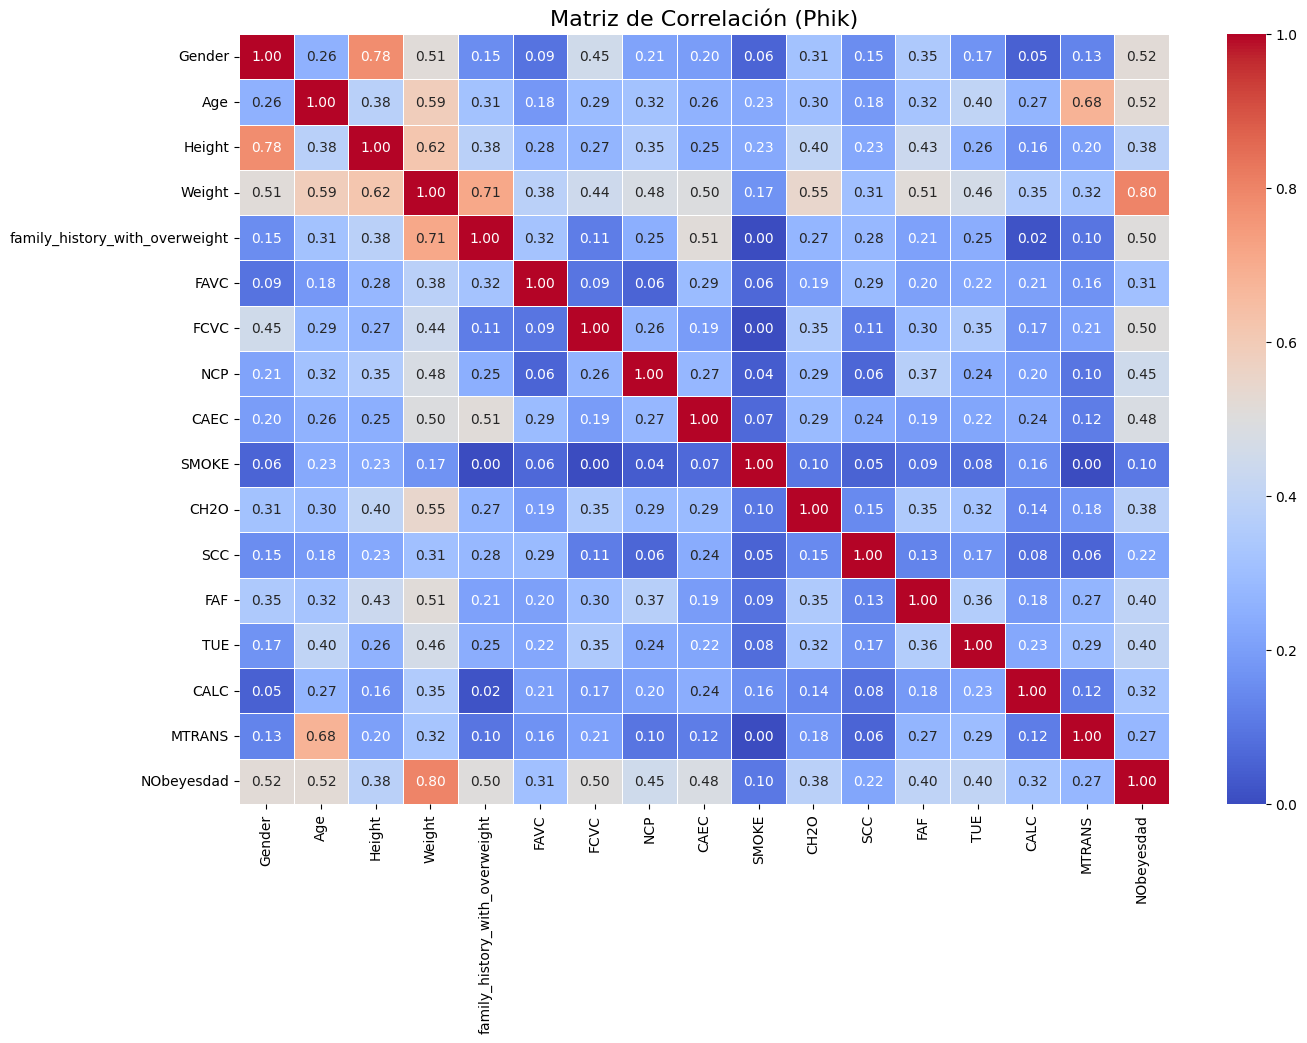

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.phik_matrix(interval_cols=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'])

# Crear un mapa de calor con valores de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Matriz de Correlación (Phik)', fontsize=16)
plt.show()

- Weight y Height (0.62): Correlación moderadamente alta, lo cual es lógico ya que el peso suele depender de la altura. Sin embargo, es importante mantener ambas porque ambas aportan información para la variable objetivo.
- Weight y family_history_with_overweight (0.71): Existe una relación moderada que podría sugerir una influencia genética, aunque esto no significa necesariamente que sean variables redundantes.
- Weight y NObeyesdad (0.80): Muy alta, lo cual tiene sentido, ya que el peso es un factor clave para determinar el nivel de obesidad. Esta relación fuerte confirma la importancia de esta variable para el modelo.
- Age y MTRANS (0.68): Esto podría indicar que ciertos modos de transporte se asocian con ciertos grupos de edad.
- NObeyesdad y Smoke (0.10): muy baja, en esta base de datos el hábito de fumar no está apenas relacionado con la obesidad

Previamente a aplicar los modelos de clasificación, observamos si los datos están balanceados. Para ello analizamos la frecuencia de cada categoría de la variable objetivo `NObeyesdad`.

Aunque el conjunto de datos original contaba con 498 participantes. Los creadores del dataset al analizar los niveles de obesidad de los participantes, determinaron que existía muchísimo desbalance de clases. Dado que los algoritmos de aprendizaje automático pueden generar resultados sesgados en conjuntos de datos con problemas de desbalanceo, aplicaron la técnica Synthetic Minority Over-sampling Technique-Nominal Continuous (SMOTE-NC) para reducir este problema. Esta técnica de sobreentrenamiento es una extensión del algoritmo original SMOTE, diseñada específicamente para manejar conjuntos de datos que contienen tanto características nominales como continuas.

Como resultado, obtuvieron un conjunto de datos con 2111 muestras y 16 características (feautures) (además de la variable objetivo), que es el que utilizaremos en este trabajo.

<ipython-input-11-dfa99e9827ed>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


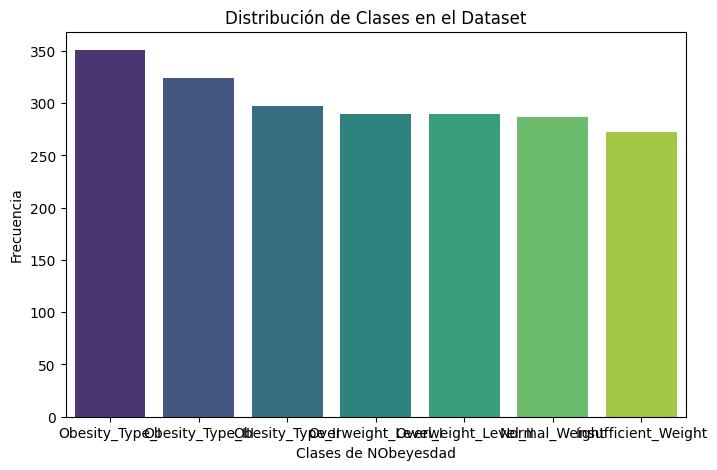

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


In [ ]:
# Contar la frecuencia de cada clase en 'NObeyesdad'
class_counts = df['NObeyesdad'].value_counts()

# Visualizar la distribución
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xlabel("Clases de NObeyesdad")
plt.ylabel("Frecuencia")
plt.title("Distribución de Clases en el Dataset")
plt.show()

# Mostrar el conteo de clases
class_counts

Observamos que los datos no están desbalanceados, ya que todas las clases tienen una cantidad similar de muestras (entre 272 y 348 observaciones por clase).  

## Preprocesamiento de Datos

### Manejo de Valores Atípicos

Variables categóricas: gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS

Variables numéricas (continuas): age, height, weight, FCVC, NCP, CH2O, FAF, TUE

Comenzamos con el estudio de los valores atípicos para las variables categóricas, donde vamos a considerar outliers aquellas categorías inusuales o con frecuencias extremadamente bajas.


--- Estudio de Valores Atípicos en Variables Categóricas ---

Gender:
Gender
Male      50.592136
Female    49.407864
Name: proportion, dtype: float64
No se detectaron outliers (frecuencia < 1%)


<ipython-input-13-0c285afc924f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=frecuencias.index, palette="viridis") #a lo mejor es mejor pintar directamente las frecuencias en %


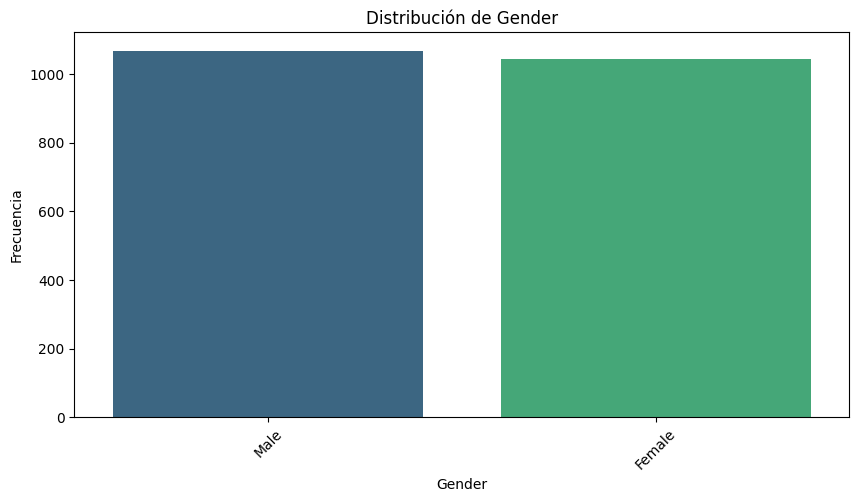


family_history_with_overweight:
family_history_with_overweight
yes    81.762198
no     18.237802
Name: proportion, dtype: float64
No se detectaron outliers (frecuencia < 1%)


<ipython-input-13-0c285afc924f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=frecuencias.index, palette="viridis") #a lo mejor es mejor pintar directamente las frecuencias en %


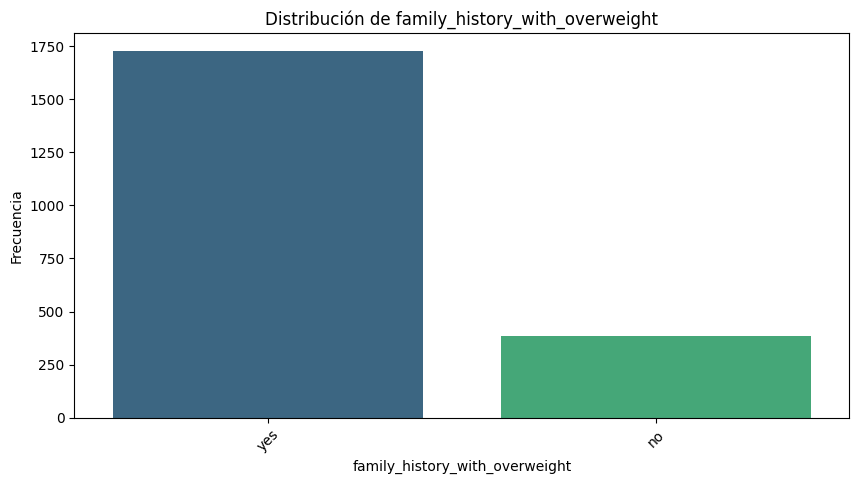


FAVC:
FAVC
yes    88.394126
no     11.605874
Name: proportion, dtype: float64
No se detectaron outliers (frecuencia < 1%)


<ipython-input-13-0c285afc924f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=frecuencias.index, palette="viridis") #a lo mejor es mejor pintar directamente las frecuencias en %


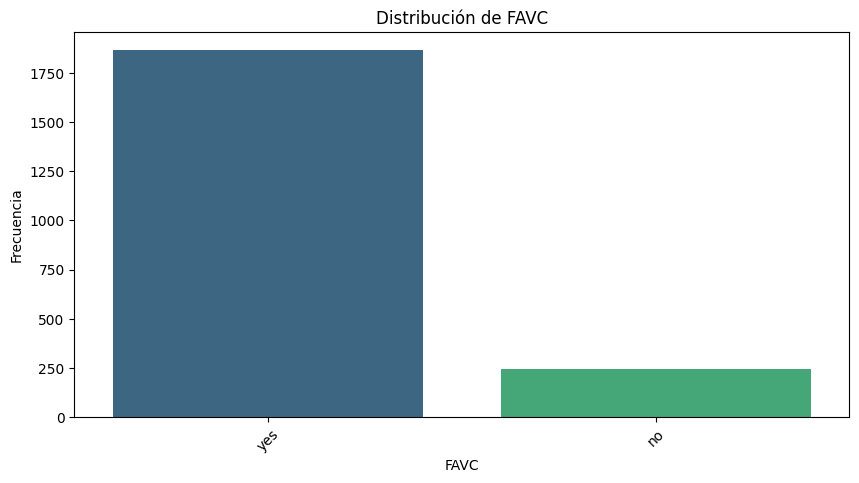


CAEC:
CAEC
Sometimes     83.609664
Frequently    11.463761
Always         2.510658
no             2.415917
Name: proportion, dtype: float64
No se detectaron outliers (frecuencia < 1%)


<ipython-input-13-0c285afc924f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=frecuencias.index, palette="viridis") #a lo mejor es mejor pintar directamente las frecuencias en %


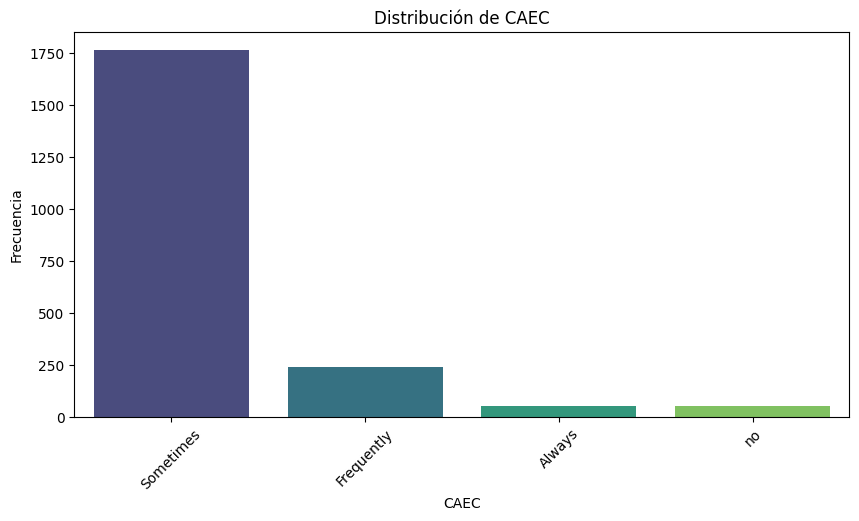


SCC:
SCC
no     95.452392
yes     4.547608
Name: proportion, dtype: float64
No se detectaron outliers (frecuencia < 1%)


<ipython-input-13-0c285afc924f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=frecuencias.index, palette="viridis") #a lo mejor es mejor pintar directamente las frecuencias en %


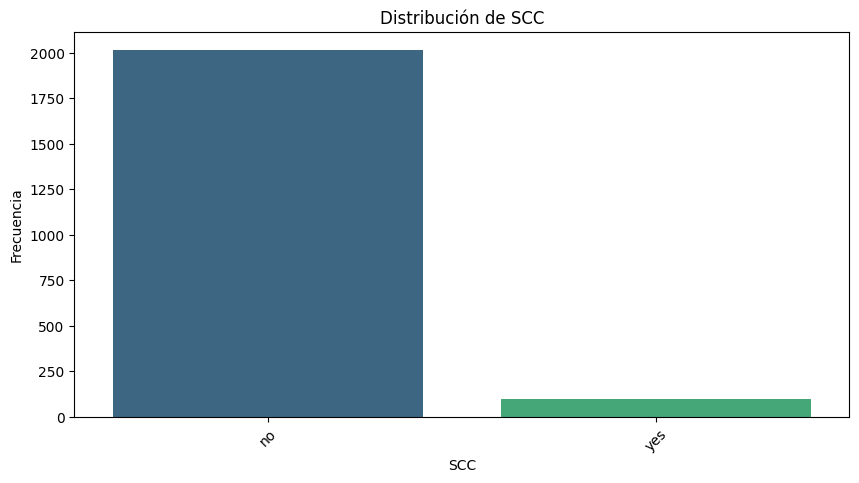


CALC:
CALC
Sometimes     66.366651
no            30.270014
Frequently     3.315964
Always         0.047371
Name: proportion, dtype: float64

Outliers detectados (frecuencia < 1%):
CALC
Always    0.047371
Name: proportion, dtype: float64


<ipython-input-13-0c285afc924f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=frecuencias.index, palette="viridis") #a lo mejor es mejor pintar directamente las frecuencias en %


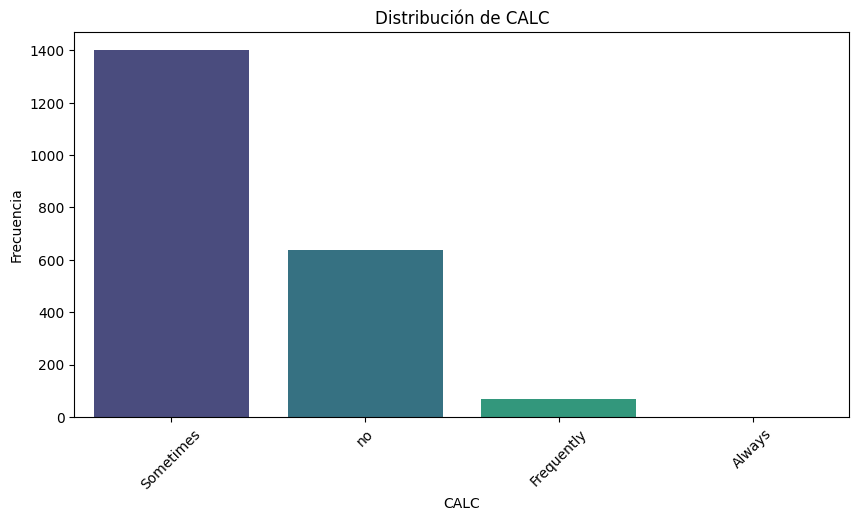


MTRANS:
MTRANS
Public_Transportation    74.846045
Automobile               21.648508
Walking                   2.652771
Motorbike                 0.521080
Bike                      0.331596
Name: proportion, dtype: float64

Outliers detectados (frecuencia < 1%):
MTRANS
Motorbike    0.521080
Bike         0.331596
Name: proportion, dtype: float64


<ipython-input-13-0c285afc924f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=frecuencias.index, palette="viridis") #a lo mejor es mejor pintar directamente las frecuencias en %


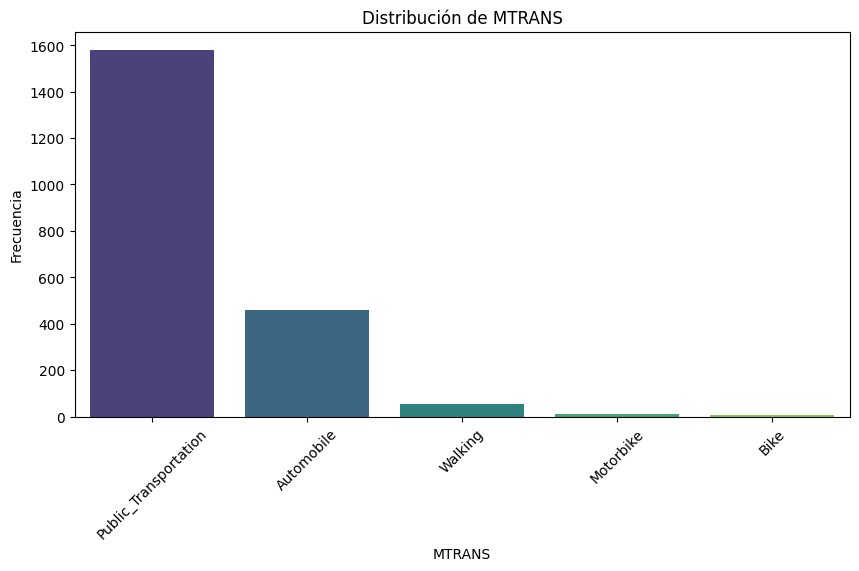


SMOKE:
SMOKE
no     97.91568
yes     2.08432
Name: proportion, dtype: float64
No se detectaron outliers (frecuencia < 1%)


<ipython-input-13-0c285afc924f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=frecuencias.index, palette="viridis") #a lo mejor es mejor pintar directamente las frecuencias en %


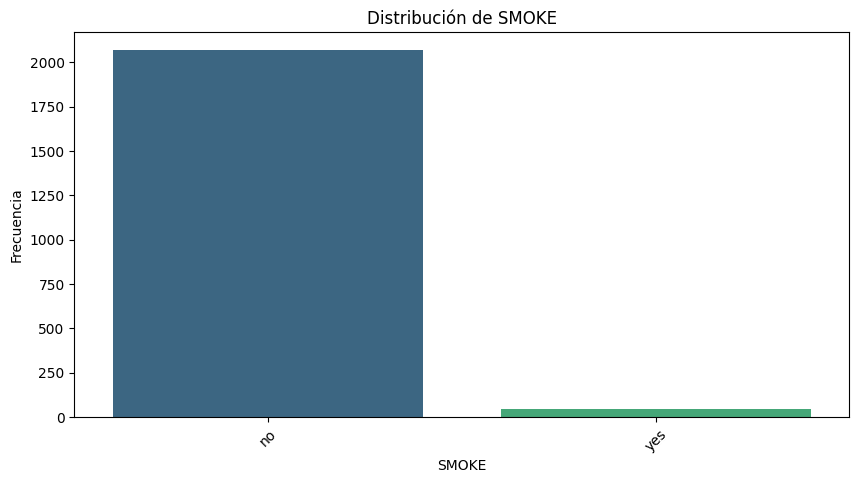

In [ ]:
# Listado de variables categóricas a analizar
categoricas = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'CALC', 'MTRANS', 'SMOKE']

print("\n--- Estudio de Valores Atípicos en Variables Categóricas ---")
for col in categoricas:
    print(f"\n{col}:")

    # Calcular la frecuencia de cada categoría
    frecuencias = df[col].value_counts(normalize=True) * 100
    print(frecuencias)

    # Identificar categorías con frecuencias menores al 1%
    outliers = frecuencias[frecuencias < 1]
    if not outliers.empty:
        print(f"\nOutliers detectados (frecuencia < 1%):")
        print(outliers)
    else:
        print("No se detectaron outliers (frecuencia < 1%)")

    # Visualizar distribución con un gráfico de barras
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[col], order=frecuencias.index, palette="viridis") #a lo mejor es mejor pintar directamente las frecuencias en %
    plt.title(f'Distribución de {col}')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

- Gender: podemos observar que la distribución es bastante equilibrada entre ambos géneros.
- family_history_with_overweight: la mayoría tienen antecedentes familiares con sobrepeso, lo cual es considerable en un estudio sobre obesidad.
- FAVC: la mayoría consume alimentos altos en calorías, relevante para nuestro estudio.
- CAEC: La categoría "No" tiene baja frecuencia, pero no llega a considerarse outlier (no llega a ser menor al 1%).
- SMOKE: La mayoría no fuma, esto puede ser relevante para analizar su impacto en la obesidad.
- SCC: La mayoría no controla su ingesta calórica, lo cual es consistente con un estudio sobre obesidad.

Outliers:

- CALC (Consumo de alcohol): La categoría "Always" tiene una frecuencia extremadamente baja. Por lo que decidimos agruparla con otra categoría ("Frequently").
- MTRANS (Transporte habitual): Las categorías "Motorbike" y "Bike" tienen frecuencias muy bajas. Por ello, decicimos agruparlas en una categoría llamada "Otros".


--- Distribución actualizada de CALC ---
CALC
Sometimes     66.366651
no            30.270014
Frequently     3.363335
Name: proportion, dtype: float64


<ipython-input-14-46b98e304e2b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['CALC'], palette="viridis")


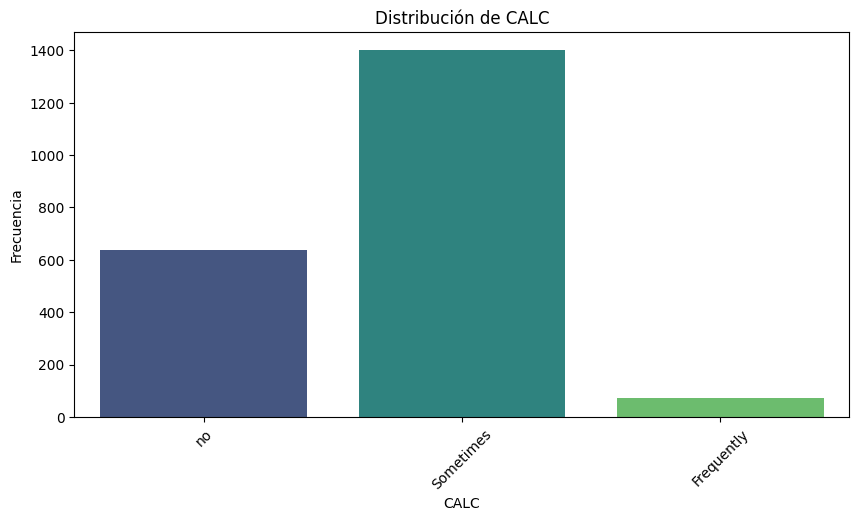

In [ ]:
# Agrupar la categoría 'Always' con 'Frequently' en la columna 'CALC'
df['CALC'] = df['CALC'].replace({'Always': 'Frequently'})

# Verificar el cambio
print("\n--- Distribución actualizada de CALC ---")
print(df['CALC'].value_counts(normalize=True) * 100)

# Visualizar la distribución actualizada con un gráfico de barras
plt.figure(figsize=(10, 5))
sns.countplot(x=df['CALC'], palette="viridis")
plt.title('Distribución de CALC')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


--- Distribución actualizada de MTRANS ---
MTRANS
Public_Transportation    74.846045
Automobile               21.648508
Walking                   2.652771
Otros                     0.852676
Name: proportion, dtype: float64


<ipython-input-15-bafd5d0a18a4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['MTRANS'], palette="viridis")


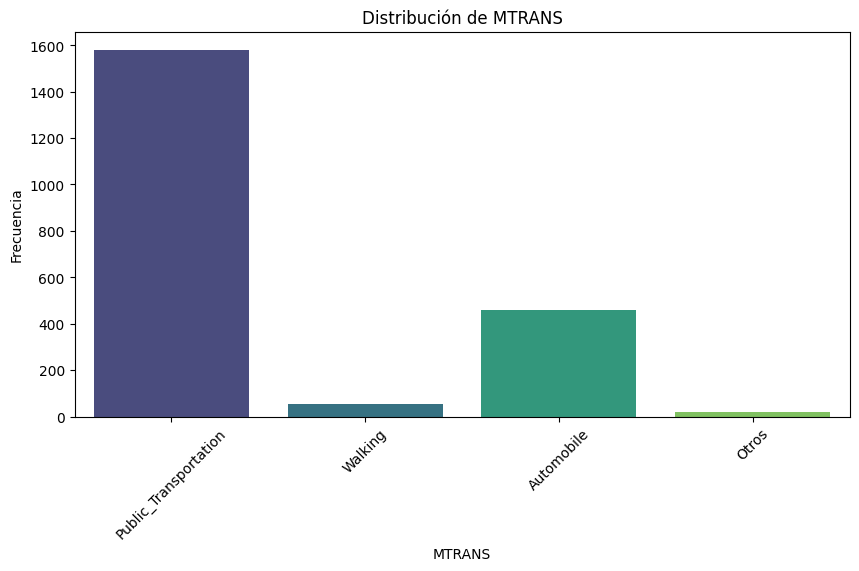

In [ ]:
# Agrupar las categorías 'Motorbike' y 'Bike' en una nueva categoría 'Otros' en la columna 'MTRANS'
df['MTRANS'] = df['MTRANS'].replace({'Motorbike': 'Otros', 'Bike': 'Otros'})

# Verificar el cambio
print("\n--- Distribución actualizada de MTRANS ---")
print(df['MTRANS'].value_counts(normalize=True) * 100)

# Visualizar la distribución actualizada con un gráfico de barras
plt.figure(figsize=(10, 5))
sns.countplot(x=df['MTRANS'], palette="viridis")
plt.title('Distribución de MTRANS')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Comprobar valores atípicos en la columna 'CALC'
print("\n--- Verificación de Valores Atípicos en CALC ---")
frecuencias_calc = df['CALC'].value_counts(normalize=True) * 100
print(frecuencias_calc)

# Identificar posibles valores atípicos en 'CALC' (frecuencia < 1%)
outliers_calc = frecuencias_calc[frecuencias_calc < 1]
if not outliers_calc.empty:
    print(f"\nValores atípicos en CALC (frecuencia < 1%):")
    print(outliers_calc)
else:
    print("No se detectaron valores atípicos en CALC (frecuencia < 1%)")

# Comprobar valores atípicos en la columna 'MTRANS'
print("\n--- Verificación de Valores Atípicos en MTRANS ---")
frecuencias_mtrans = df['MTRANS'].value_counts(normalize=True) * 100
print(frecuencias_mtrans)

# Identificar posibles valores atípicos en 'MTRANS' (frecuencia < 1%)
outliers_mtrans = frecuencias_mtrans[frecuencias_mtrans < 1]
if not outliers_mtrans.empty:
    print(f"\nValores atípicos en MTRANS (frecuencia < 1%):")
    print(outliers_mtrans)
else:
    print("No se detectaron valores atípicos en MTRANS (frecuencia < 1%)")


--- Verificación de Valores Atípicos en CALC ---
CALC
Sometimes     66.366651
no            30.270014
Frequently     3.363335
Name: proportion, dtype: float64
No se detectaron valores atípicos en CALC (frecuencia < 1%)

--- Verificación de Valores Atípicos en MTRANS ---
MTRANS
Public_Transportation    74.846045
Automobile               21.648508
Walking                   2.652771
Otros                     0.852676
Name: proportion, dtype: float64

Valores atípicos en MTRANS (frecuencia < 1%):
MTRANS
Otros    0.852676
Name: proportion, dtype: float64



--- Distribución de MTRANS después de eliminar 'Otros' ---
MTRANS
Public_Transportation    75.489728
Automobile               21.834687
Walking                   2.675585
Name: proportion, dtype: float64


<ipython-input-17-78bfdde565c6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['MTRANS'], palette="viridis")


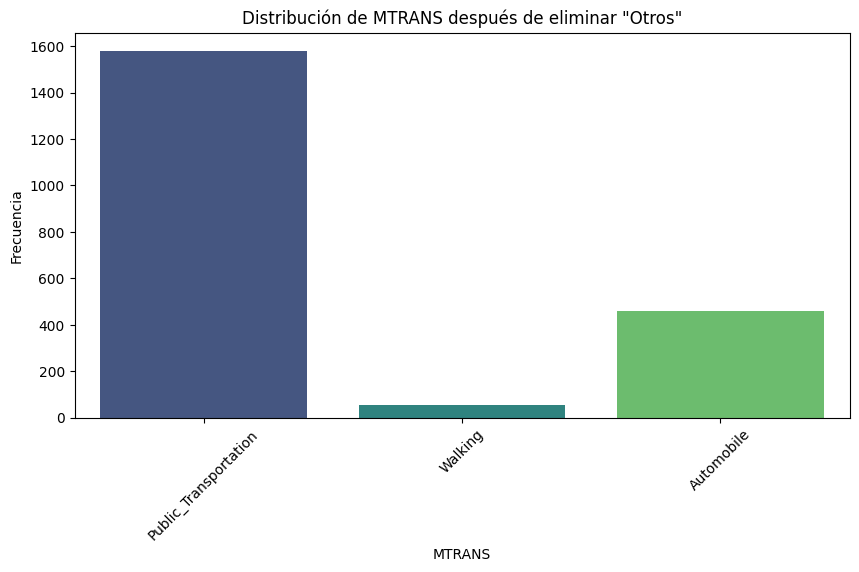

In [ ]:
# Eliminar la categoría 'Otros' de la columna 'MTRANS'
df = df[df['MTRANS'] != 'Otros']

# Verificar la distribución después de eliminar 'Otros'
print("\n--- Distribución de MTRANS después de eliminar 'Otros' ---")
print(df['MTRANS'].value_counts(normalize=True) * 100)

# Visualizar la distribución actualizada con un gráfico de barras
plt.figure(figsize=(10, 5))
sns.countplot(x=df['MTRANS'], palette="viridis")
plt.title('Distribución de MTRANS después de eliminar "Otros"')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Continuamos con el estudio de valores atípicos para las variables numéricas (continuas): age, height, weight, FCVC, NCP, CH2O, FAF, TUE. Para ello, vamos a utilizar métodos estadísticos como el IQR (Interquartile Range) o los Boxplots para identificar outliers.


--- Estudio de Valores Atípicos en Variables Continuas ---

Age:

Valores atípicos detectados en Age(165): 
            Age
13    41.000000
21    52.000000
33    39.000000
92    55.000000
104   38.000000
...         ...
1740  37.765356
1775  37.207082
1776  38.108940
1777  38.644441
1778  38.112989

[165 rows x 1 columns]


<ipython-input-18-1031fed3eeda>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="viridis")


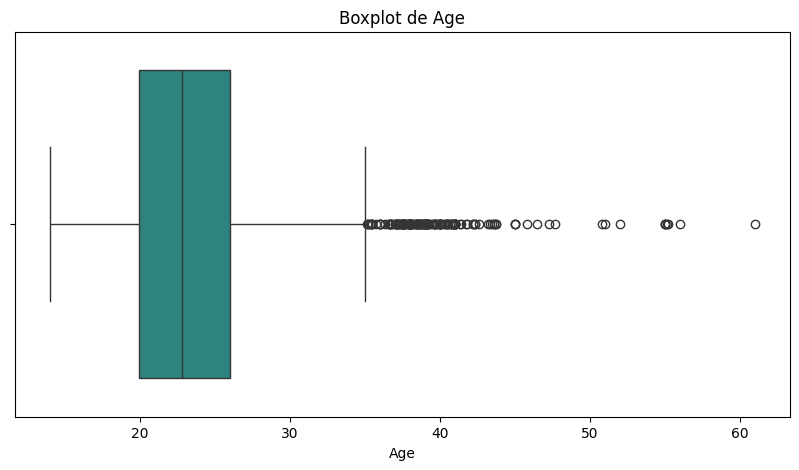


Height:

Valores atípicos detectados en Height(2): 
        Height
349   1.980000
1350  1.975663


<ipython-input-18-1031fed3eeda>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="viridis")


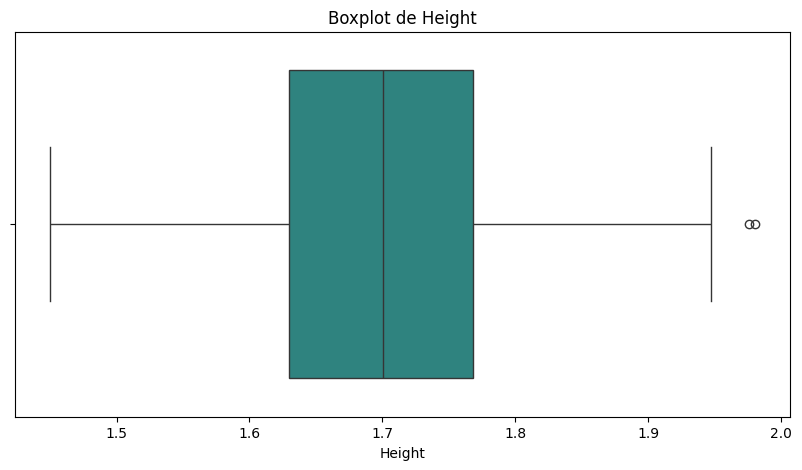


Weight:

Valores atípicos detectados en Weight(1): 
     Weight
344   173.0


<ipython-input-18-1031fed3eeda>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="viridis")


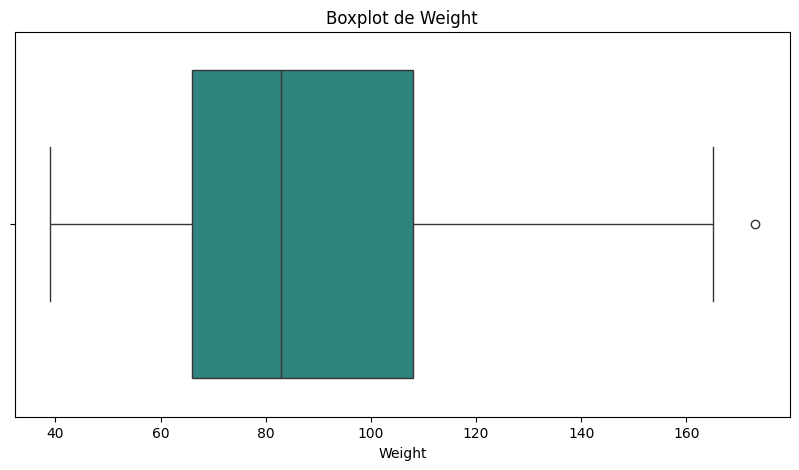


FCVC:
No se detectaron valores atípicos en FCVC


<ipython-input-18-1031fed3eeda>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="viridis")


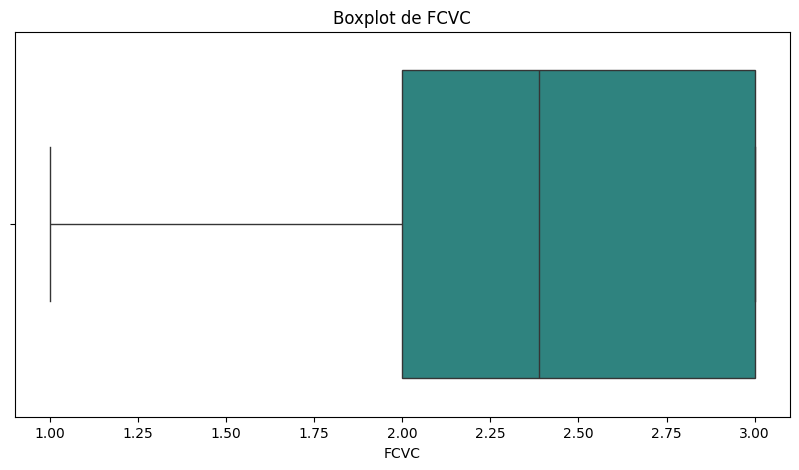


NCP:

Valores atípicos detectados en NCP(576): 
           NCP
4     1.000000
14    1.000000
16    1.000000
17    1.000000
18    4.000000
...        ...
1794  2.142328
1795  1.437959
1796  1.343117
1797  1.213431
1798  1.089048

[576 rows x 1 columns]


<ipython-input-18-1031fed3eeda>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="viridis")


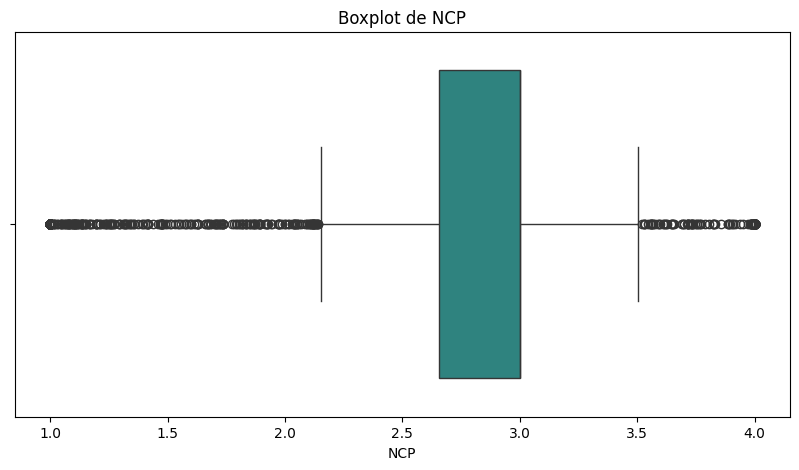


CH2O:
No se detectaron valores atípicos en CH2O


<ipython-input-18-1031fed3eeda>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="viridis")


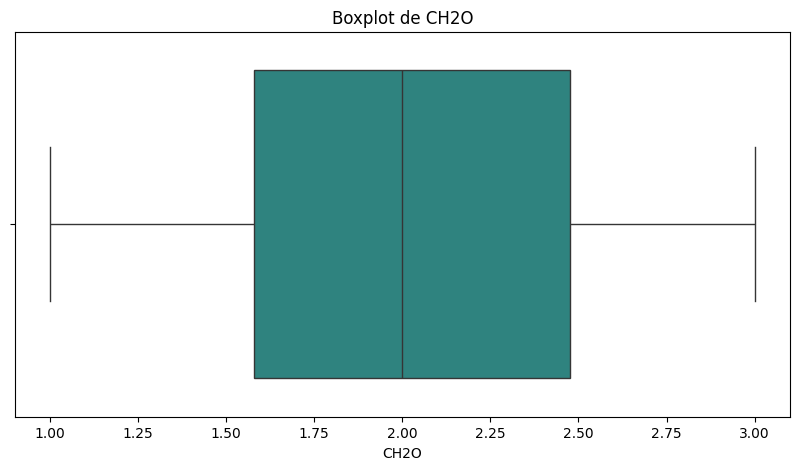


FAF:
No se detectaron valores atípicos en FAF


<ipython-input-18-1031fed3eeda>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="viridis")


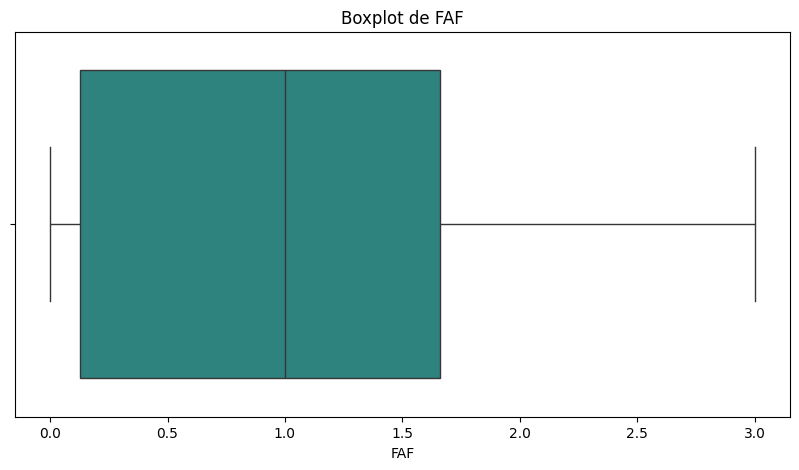


TUE:
No se detectaron valores atípicos en TUE


<ipython-input-18-1031fed3eeda>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="viridis")


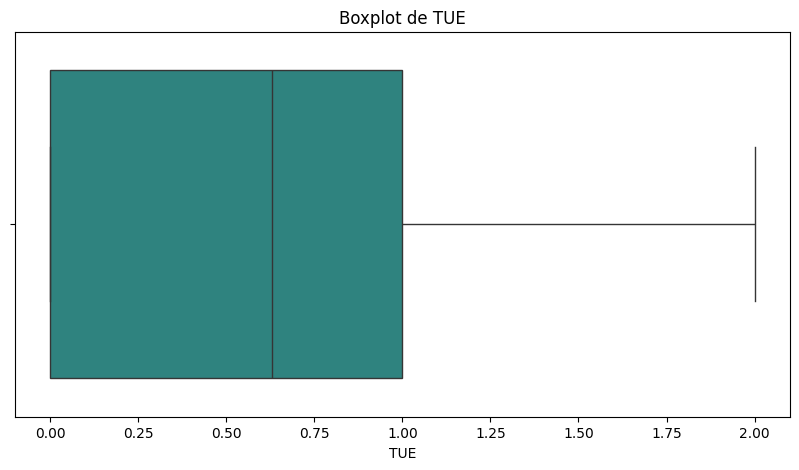

In [ ]:
# Lista de variables continuas
continuas = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

print("\n--- Estudio de Valores Atípicos en Variables Continuas ---")
for col in continuas:
    print(f"\n{col}:")

    # Calcular Q1 (primer cuartil), Q3 (tercer cuartil) y el IQR (rango intercuartílico)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para los valores atípicos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar los valores atípicos
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]

    # Mostrar los valores atípicos
    if not outliers.empty:
        print(f"\nValores atípicos detectados en {col}({len(outliers[[col]])}): ")
        print(outliers[[col]] )
    else:
        print(f"No se detectaron valores atípicos en {col}")

    # Visualizar la distribución de la variable con un gráfico de caja (boxplot)
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col], palette="viridis")
    plt.title(f'Boxplot de {col}')
    plt.show()

Variables sin valores atípicos:
- FCVC, CH2O, FAF, TUE: No se detectaron valores atípicos.

Variables con valores atípicos:
- Age: Se encontraron 165 valores atípicos.
- Height: Se detectaron 2 valores atípicos.
- Weight: Se encontró 1 valor atípico.
- NCP: Se detectaron 576 valores atípicos.

In [ ]:
# Variables con valores atípicos
variables_atipicas = ['Age', 'Height', 'Weight', 'NCP']

print("\n--- Estadísticos Descriptivos de Variables con Valores Atípicos ---")
for col in variables_atipicas:
    print(f"\n{col}:")

    # Calcular los estadísticos descriptivos
    stats = df[col].describe()
    print(stats)


--- Estadísticos Descriptivos de Variables con Valores Atípicos ---

Age:
count    2093.000000
mean       24.301910
std         6.333014
min        14.000000
25%        19.946244
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

Height:
count    2093.000000
mean        1.701591
std         0.093229
min         1.450000
25%         1.630000
50%         1.700181
75%         1.768235
max         1.980000
Name: Height, dtype: float64

Weight:
count    2093.000000
mean       86.689999
std        26.239812
min        39.000000
25%        65.912688
50%        83.000000
75%       107.998815
max       173.000000
Name: Weight, dtype: float64

NCP:
count    2093.000000
mean        2.684358
std         0.778653
min         1.000000
25%         2.657720
50%         3.000000
75%         3.000000
max         4.000000
Name: NCP, dtype: float64


- Age: La edad está en un rango lógico, entre 14 y 61 años. Aunque algunos valores pueden ser considerados atípicos, no están fuera del rango lógico.
- Height: La altura también está en un rango razonable, ya que el mínimo es 1.45 metro y el máximo es 1.98 metros.
- Weight: El peso también se encuentra en un rango adecuado, con el mínimo en 39 kg y el máximo en 173 kg (que es alto, pero es razonable en nuestro estudio).
- NCP (Número de comidas principales consumidas diariamente): Los valores están dentro de un rango esperado, con un mínimo de 1 comida y un máximo de 4.

Por tanto, concluimos que estos valores atípicos representan casos menos frecuentes, pero no necesariamente un error de medición o de registro.

### Manejo de Valores Nulos

In [ ]:
# Verificar valores nulos
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


No hay valores nulos.

### Codificación de Variables Categóricas

Vamos a aplicar la codificación de Etiquetas (Label Encoding) para las variables cuyas categorías tienen un orden natural. En nuestro caso son:
- 'CAEC'(Indica si la persona consume alimentos entre comidas) con categorías: 'no', 'sometimes', 'frequently', 'always'.
- 'CALC'(frecuencia de consumo de alcohol) con categorías: 'no', 'sometimes', 'frequently'.

Para el resto de variables, donde no tenemos un orden específico, aplicaremos la codificación One-Hot (One-Hot Encoding). En nuestro caso son: 'Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS'.


In [ ]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df['NObeyesdad'].value_counts()

,count
NObeyesdad,
Obesity_Type_I,348
Obesity_Type_III,324
Obesity_Type_II,296
Overweight_Level_II,289
Overweight_Level_I,287
Normal_Weight,277
Insufficient_Weight,272


In [ ]:
nominal_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SCC', 'SMOKE', 'MTRANS']

# Codificación One-Hot para variables nominales
df_nominal_encoded = pd.get_dummies(df[nominal_columns], drop_first=True)

# Convertir a 0 y 1 explícitamente
df_nominal_encoded = df_nominal_encoded.astype(int)

# Diccionarios para variables ordinales
ordinal_mappings = {
    'CAEC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'CALC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'NObeyesdad': {
        'Insufficient_Weight': 0,
        'Normal_Weight': 1,
        'Overweight_Level_I': 2,
        'Overweight_Level_II': 3,
        'Obesity_Type_I': 4,
        'Obesity_Type_II': 5,
        'Obesity_Type_III': 6
    }
}

# Aplicar el mapeo a cada columna ordinal
for col, mapping in ordinal_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

# Combinar el DataFrame original con las columnas codificadas
df = pd.concat([df.drop(columns=nominal_columns), df_nominal_encoded], axis=1)

display(df.head())

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SCC_yes,SMOKE_yes,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,1,2.0,0.0,1.0,0,1,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,1,3.0,3.0,0.0,1,1,0,1,0,1,1,1,0
2,23.0,1.80,77.0,2.0,3.0,1,2.0,2.0,1.0,2,1,1,1,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,1,2.0,2.0,0.0,2,2,1,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,1,2.0,0.0,0.0,1,3,1,0,0,0,0,1,0


# Modelado: Comparación de modelos no lineales

In [ ]:
# Separar características (X) y variable objetivo (y)
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']  # Es una sola columna con valores enteros (los codificados)

En este paso, utilizamos la técnica de Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de los datos de un espacio multidimensional a dos dimensiones. Esta técnica transforma las características originales en un nuevo conjunto de variables ortogonales (componentes principales), ordenadas por la cantidad de varianza que explican en los datos. Al proyectar nuestros datos a dos dimensiones, podemos graficarlos, lo que nos permite observar si los datos tienen una estructura clara o no. Observamos que las clases aparecen bastante mezcladas, lo que nos sugiere utilizar métodos de clasificación más flexibles, como los no lineales. Esta visualización es útil para comprender mejor la estructura de los datos antes de aplicar modelos más complejos, como los SVM con kernels no lineales.

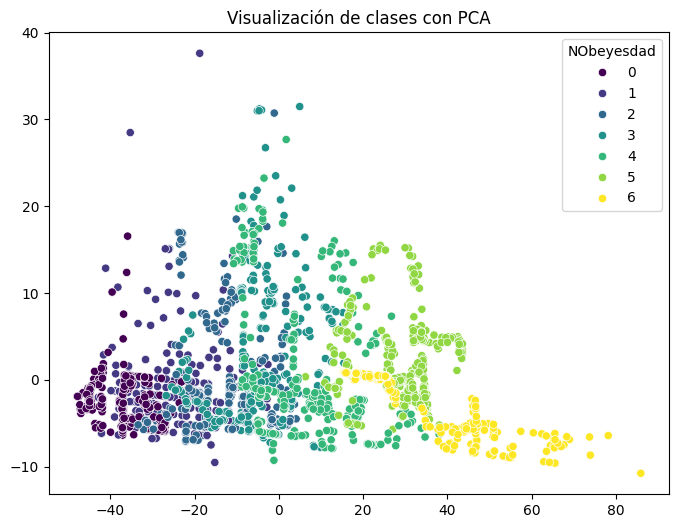

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop(columns=['NObeyesdad']))  # Excluyendo la variable objetivo

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['NObeyesdad'], palette='viridis')
plt.title("Visualización de clases con PCA")
plt.show()

A continuación, separamos los datos en tres conjuntos: el conjunto de entrenamiento, que utilizaremos para entrenar el modelo; el conjunto de validación, que nos permitirá ajustar los hiperparámetros y evaluar el rendimiento del modelo durante el entrenamiento; y el conjunto de prueba, que utilizaremos para evaluar la capacidad de generalización del modelo y su desempeño final en datos no vistos.

In [ ]:
# Dividir en entrenamiento (70%), validación (15%) y prueba (15%)

# Dividimos en entrenamiento (70%) y otro 30%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # conjunto de entrenamiento

#Dividimos el segundo conjunto(30%) en un 15% para validación y un 15% para test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp) # conjuntos de validación y prueba

# Escalar solo con los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#-  SVM NO LINEAL con todas las features

El modelo SVM no lineal utiliza el kernel RBF (Radial Basis Function) para manejar problemas donde las clases no son separables linealmente. Este kernel mapea las entradas a un espacio de mayor dimensión, facilitando la separación de clases de manera efectiva. La función del kernel RBF se expresa como:

$K(x, x') = exp(- ||x - x'||^2 / (2 \cdot \sigma^2))$

Donde:
- x y x' son dos vectores de entrada (puntos de datos),
- $\sigma$ es un parámetro que controla la amplitud de la función de similitud,
- ||x - x'|| es la distancia euclidiana entre los puntos x y x'.

El kernel RBF es útil para problemas de clasificación complejos con fronteras de decisión no lineales, ya que permite separar las clases de manera más efectiva que los modelos lineales.


In [ ]:
# Crear y entrenar el modelo SVM con kernel RBF
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

train_accuracies = []
val_accuracies = []

# Entrenar el modelo con diferentes tamaños de datos para visualizar la curva de aprendizaje
for frac in np.linspace(0.1, 1.0, 10):
    X_train_frac = X_train_scaled[:int(frac * len(X_train_scaled))]
    y_train_frac = y_train[:int(frac * len(y_train))]

    # Entrenamiento inicial con el conjunto de entrenamiento
    svm_model.fit(X_train_frac, y_train_frac)

    # Evaluar en entrenamiento y validación
    train_acc = accuracy_score(y_train_frac, svm_model.predict(X_train_frac))
    val_acc = accuracy_score(y_val, svm_model.predict(X_val_scaled))

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Evaluar el modelo final

# Entrenar con el conjunto completo de entrenamiento y validación
X_train_val = np.concatenate((X_train_scaled, X_val_scaled), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

svm_model.fit(X_train_val, y_train_val)

# Evaluación final en el conjunto de prueba
y_pred = svm_model.predict(X_test_scaled)
print("Clasificación del Test Set:\n", classification_report(y_test, y_pred))

Clasificación del Test Set:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        41
           1       0.70      0.74      0.72        42
           2       0.81      0.79      0.80        43
           3       0.84      0.86      0.85        43
           4       1.00      0.96      0.98        52
           5       0.98      0.98      0.98        45
           6       1.00      1.00      1.00        48

    accuracy                           0.89       314
   macro avg       0.89      0.89      0.89       314
weighted avg       0.90      0.89      0.90       314



Los resultados indican que el modelo SVM con kernel RBF está funcionando bastante bien en general, con una exactitud del 89%.

- Desempeño general: el modelo tiene un buen rendimiento global (accuracy = 0.89), lo que sugiere que está clasificando correctamente la mayoría de los casos.
El F1-score macro y weighted avg son 0.89 y 0.90, lo que indica que el modelo mantiene un rendimiento consistente en todas las clases.

- Clases con mejor desempeño: La clase 6 (F1-score = 1.00) y las clases 4 y 5 (F1-score = 0.98) son las mejor clasificadas, lo que sugiere que el modelo distingue muy bien estas categorías.

- Clases con menor desempeño: La clase 1 (F1-score = 0.72) tiene el rendimiento más bajo, con un recall de 0.74, lo que indica que el modelo no está identificando correctamente algunos casos de esta clase. La clase 2 (F1-score = 0.80) también muestra un rendimiento más bajo en comparación con las demás, aunque sigue siendo aceptable.

En general, el modelo tiene un buen desempeño, aunque mejorar la clasificación de la clase 1 podría ayudar a equilibrar aún más los resultados.




In [ ]:
# Evaluación en el conjunto de entrenamiento + validación
train_val_acc = svm_model.score(X_train_val, y_train_val)

# Evaluación en el conjunto de prueba
test_acc = svm_model.score(X_test_scaled, y_test)

# Imprimir los resultados
print(f"Train + Validation Accuracy: {train_val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Generar las predicciones para el conjunto de entrenamiento + validación
y_train_val_pred = svm_model.predict(X_train_val)

# Generar las predicciones para el conjunto de prueba
y_test_pred = svm_model.predict(X_test_scaled)

# Calcular el F1 score en el conjunto de entrenamiento + validación
f1_train_val = f1_score(y_train_val, y_train_val_pred, average='weighted')  # 'weighted' es útil si las clases están desbalanceadas

# Calcular el F1 score en el conjunto de prueba
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Imprimir los resultados del F1 score
print(f"Train + Validation F1 Score: {f1_train_val:.4f}")
print(f"Test F1 Score: {f1_test:.4f}")

Train + Validation Accuracy: 0.9427
Test Accuracy: 0.8949
Train + Validation F1 Score: 0.9430
Test F1 Score: 0.8957


El modelo SVM ha logrado una alta precisión en la clasificación de niveles de obesidad, con un 94.27% de precisión en entrenamiento + validación y un 89.49% en prueba, lo que indica una buena capacidad de generalización con una ligera diferencia entre ambos conjuntos. El F1-score también muestra valores similares, sugiriendo un equilibrio entre precisión y recall.


El modelo SVC tiene dos hiperparámetros clave en el kernel RBF que podemos ajustar para mejorar la clasificación:

- C (regularización): Controla cuánto permitimos que el modelo aprenda de los datos. Valores altos pueden llevar a sobreajuste, mientras que valores bajos pueden dar un modelo muy simple.
- gamma (𝛾, coeficiente del kernel RBF): Determina la influencia de cada punto en la clasificación. Valores altos hacen que el modelo se enfoque en puntos individuales (sobreajuste), mientras que valores bajos hacen que sea más general.

Para encontrar los mejores valores de C y gamma, usaremos GridSearchCV, que hace validación cruzada probando varias combinaciones:

Mejores hiperparámetros: {'C': 100, 'gamma': 0.01}


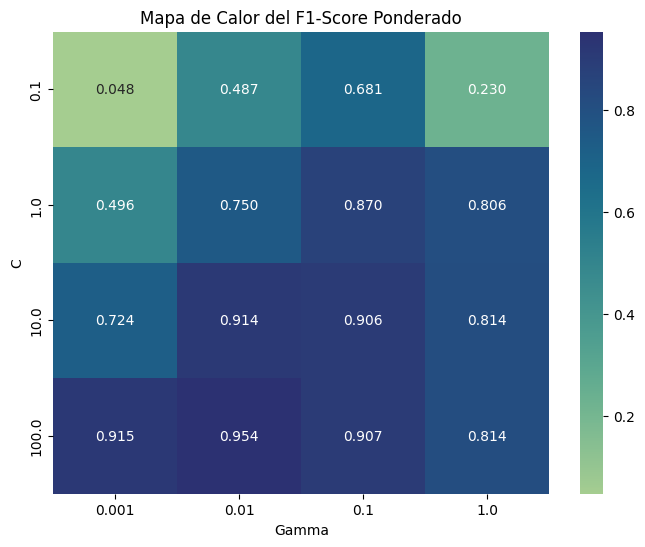

Cross-validation F1 Score (promedio): 0.9532
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.91      0.93      0.92        42
           2       0.89      0.93      0.91        43
           3       0.95      0.93      0.94        43
           4       1.00      0.98      0.99        52
           5       1.00      1.00      1.00        45
           6       1.00      1.00      1.00        48

    accuracy                           0.96       314
   macro avg       0.96      0.96      0.96       314
weighted avg       0.96      0.96      0.96       314



In [ ]:
# Definir el modelo SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Definir los valores de hiperparámetros a probar
param_grid = {
    'C': [0.1, 1, 10, 100],  # Valores pequeños -> modelo simple, grandes -> modelo más complejo
    'gamma': [0.001, 0.01, 0.1, 1]  # Valores pequeños -> más general, grandes -> más sensible
}

# Validación cruzada con GridSearch en el conjunto de entrenamiento (sin incluir validación aún)
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Representar la evolución de la puntuación F1 en función de los hiperparámetros
scores = grid_search.cv_results_['mean_test_score']
C_values = np.array(param_grid['C'])
gamma_values = np.array(param_grid['gamma'])
scores_matrix = scores.reshape(len(C_values), len(gamma_values))

plt.figure(figsize=(8, 6))
sns.heatmap(scores_matrix, annot=True, xticklabels=gamma_values, yticklabels=C_values, cmap="crest", fmt=".3f")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.title("Mapa de Calor del F1-Score Ponderado")
plt.show()

# Entrenar el mejor modelo con el conjunto de entrenamiento y validación
best_svm = SVC(kernel='rbf', probability=True, random_state=42, **best_params)

# Realizar validación cruzada para evaluar si el modelo está sobreajustando
cross_val_scores = cross_val_score(best_svm, np.vstack([X_train_scaled, X_val_scaled]),
                                   np.hstack([y_train, y_val]), cv=5, scoring='f1_weighted', n_jobs=-1)

print(f"Cross-validation F1 Score (promedio): {cross_val_scores.mean():.4f}")


best_svm.fit(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val]))

# Evaluación final en el conjunto de prueba
y_test_pred = best_svm.predict(X_test_scaled)
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))

Tras optimizar el modelo SVM con GridSearchCV, la exactitud aumentó de 89% al 95%, con mejoras notables en las clases más débiles, como la 1 (F1-score de 0.72 a 0.92) y la 2 (0.80 a 0.91). Además, la validación cruzada muestra un F1-score medio de 0.96, indicando mayor generalización y menor riesgo de sobreajuste.

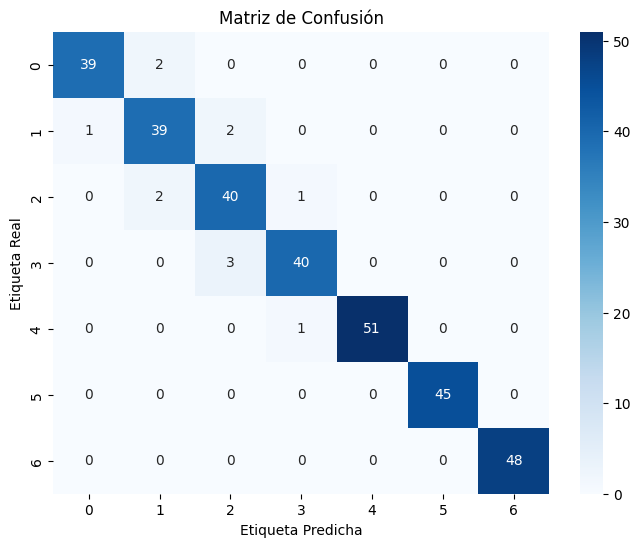

In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
plt.show()

La matriz de confusión obtenida muestra que el modelo SVM ha tenido un buen desempeño en la clasificación de las clases de obesidad, aunque algunos errores aún son evidentes. La mayoría de las clases tienen un alto número de aciertos en la diagonal (casos correctamente clasificados), especialmente en la clase 4 (con 51 muestras correctamente clasificadas) y en las clases 6 y 5, donde todos los elementos han sido clasificados correctamente. Sin embargo, hay algunos errores de clasificación, como la clase 2 que tiene 5 falsos positivos. Estos errores podrían deberse a una similitud en las características de las clases, lo que sugiere que el modelo podría mejorar con más datos o una mayor optimización de los hiperparámetros.

En general, el modelo ha mostrado una capacidad sólida para clasificar correctamente la mayoría de los casos, con una ligera tendencia a confundir ciertas clases. El balance entre las clases también parece ser adecuado, ya que la distribución de muestras por clase es bastante homogénea, lo que ayuda al modelo a aprender de manera eficiente.

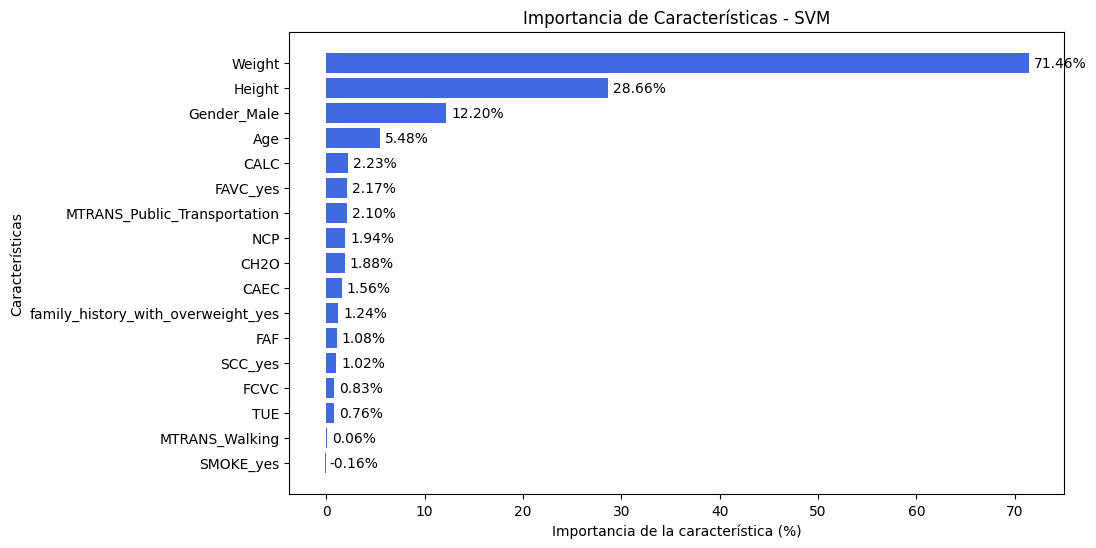

In [ ]:
# Evaluar la importancia de las características en el conjunto de prueba
result = permutation_importance(best_svm, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Obtener la importancia de las características
importance = result.importances_mean

# Ordenar las características por importancia
indices = np.argsort(importance)[::-1]
features = X_test.columns[indices]
importance_sorted = importance[indices] * 100  # Convertir a porcentaje

# Graficar la importancia de las características con valores en las barras
plt.figure(figsize=(10, 6))
bars = plt.barh(features, importance_sorted, color='royalblue')

# Agregar los valores en las barras
for bar, value in zip(bars, importance_sorted):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{value:.2f}%', va='center')

plt.xlabel('Importancia de la característica (%)')
plt.ylabel('Características')
plt.title('Importancia de Características - SVM')
plt.gca().invert_yaxis()
plt.show()

Observamos que la variable Weight (Peso) tiene una importancia muy alta (0.7086) pero como predecimos la obesidad es esperado, ya que es una de las variables más directamente relacionadas con el resultado. Sin embargo, eso no significa necesariamente que haya sobreajuste.

Para estudiar si hay sobreajuste podemos comparar la exactitud en el conjunto de entrenamiento y en el test, así como graficar la curva de aprendizaje.

In [ ]:
# Calcular la precisión en el conjunto de entrenamiento + validación y el de prueba
train_val_pred = best_svm.predict(np.vstack([X_train_scaled, X_val_scaled]))
test_pred = best_svm.predict(X_test_scaled)

# Precisión
train_val_acc = precision_score(np.hstack([y_train, y_val]), train_val_pred, average='weighted')
test_acc = precision_score(y_test, test_pred, average='weighted')

# Calcular el recall en el conjunto de entrenamiento + validación y el de prueba
train_val_recall = recall_score(np.hstack([y_train, y_val]), train_val_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')

# F1 score
train_val_f1 = f1_score(np.hstack([y_train, y_val]), train_val_pred, average='weighted')
test_f1 = f1_score(y_test, test_pred, average='weighted')

# Imprimir los resultados
print(f"Train + Validation Accuracy: {train_val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Train + Validation Recall: {train_val_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Train + Validation F1 Score: {train_val_f1:.4f}")

Train + Validation Accuracy: 0.9972
Test Accuracy: 0.9626
Train + Validation Recall: 0.9972
Test Recall: 0.9618
Train + Validation F1 Score: 0.9972


Los resultados obtenidos muestran un rendimiento excelente del modelo SVM en términos de precisión, recall y F1 score tanto en el conjunto de entrenamiento + validación como en el conjunto de prueba, con un 99.7% en el primero y un 96% en el segundo. Esto indica que el modelo ha aprendido de manera efectiva a clasificar las muestras, manteniendo un buen balance entre la detección de las clases correctas y la minimización de los falsos positivos y negativos. La ligera diferencia entre los resultados de entrenamiento y prueba sugiere que el modelo está generalizando bien, sin sobreajustarse a los datos de entrenamiento, lo que es un buen indicador de su capacidad de generalización a datos no vistos.

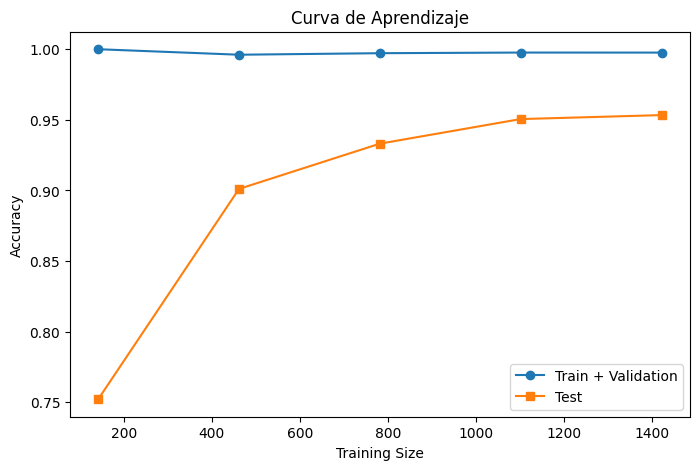

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    best_svm, np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val]), cv=5, scoring='accuracy', n_jobs=-1)

# Calcular promedios
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Graficar curva de aprendizaje
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Train + Validation", marker='o')
plt.plot(train_sizes, test_mean, label="Test", marker='s')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Curva de Aprendizaje")
plt.show()

En la gráfica de aprendizaje, se confirma lo que indican las métricas: el modelo muestra un rendimiento consistente tanto en el conjunto de train + validation como en el de test. La estabilidad en ambas curvas sugiere que el modelo no está sobreajustando, lo que respalda la alta precisión, recall y F1 score obtenidos previamente. Esto refuerza la idea de que el modelo generaliza bien y no está aprendiendo de forma excesiva los detalles específicos del conjunto de entrenamiento, sino que está aplicando correctamente lo aprendido a nuevos datos.

#-  SVM NO LINEAL sin la variable weight

Hacemos el modelo sin la variable Weight ya que su alta correlación (0.8) con la variable objetivo 'NObeyesdad' podría llevar a un sobreajuste. Esto implicaría que el modelo aprende patrones específicos de los datos de entrenamiento pero falla al generalizar a nuevos datos. Al eliminarla, se busca que el modelo aprenda patrones más generales y menos dependientes de una sola característica, lo que mejora la capacidad de generalización y evita que el modelo esté excesivamente ajustado a las particularidades del conjunto de entrenamiento.


In [ ]:
# Separar características (X) y variable objetivo (y), sin la columna 'weight'
X = df.drop(columns=['NObeyesdad', 'Weight'])  # Eliminar 'weight' de las características
y = df['NObeyesdad']  # Variable objetivo

In [ ]:
# Dividir en entrenamiento (70%), validación (15%) y prueba (15%)

# Dividimos en entrenamiento (70%) y otro 30%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # conjunto de entrenamiento
#con stratify=y nos aseguramos que las clases tengan una distribución similar en cada conjunto

#Dividimos el segundo conjunto(30%) en un 15% para validación y un 15% para test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp) # conjuntos de validación y prueba

# Escalar solo con los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Crear y entrenar el modelo SVM con kernel RBF
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
# Utilizamos los parámetros:
# C = 1.0
# gamma = 1 / (n_features * var(X)), donde var(X) es la varianza de los datos de entrada)

train_accuracies = []
val_accuracies = []

# Entrenar el modelo con diferentes tamaños de datos para visualizar la curva de aprendizaje
for frac in np.linspace(0.1, 1.0, 10):
    X_train_frac = X_train_scaled[:int(frac * len(X_train_scaled))]
    y_train_frac = y_train[:int(frac * len(y_train))]

    # Entrenamiento inicial con el conjunto de entrenamiento
    svm_model.fit(X_train_frac, y_train_frac)

    # Evaluar en entrenamiento y validación
    train_acc = accuracy_score(y_train_frac, svm_model.predict(X_train_frac))
    val_acc = accuracy_score(y_val, svm_model.predict(X_val_scaled))

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Evaluar el modelo final:

# Entrenar con el conjunto completo de entrenamiento y validación
X_train_val = np.concatenate((X_train_scaled, X_val_scaled), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

svm_model.fit(X_train_val, y_train_val)

# Evaluación final en el conjunto de prueba
y_pred = svm_model.predict(X_test_scaled)
print("Clasificación del Test Set:\n", classification_report(y_test, y_pred))

Clasificación del Test Set:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80        41
           1       0.67      0.57      0.62        42
           2       0.68      0.70      0.69        43
           3       0.79      0.70      0.74        43
           4       0.81      0.83      0.82        52
           5       0.85      0.91      0.88        45
           6       0.98      1.00      0.99        48

    accuracy                           0.80       314
   macro avg       0.79      0.79      0.79       314
weighted avg       0.80      0.80      0.80       314



In [ ]:
# Evaluación en el conjunto de entrenamiento + validación
train_val_acc = svm_model.score(X_train_val, y_train_val)

# Evaluación en el conjunto de prueba
test_acc = svm_model.score(X_test_scaled, y_test)

# Imprimir los resultados
print(f"Train + Validation Accuracy: {train_val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Generar las predicciones para el conjunto de entrenamiento + validación
y_train_val_pred = svm_model.predict(X_train_val)

# Generar las predicciones para el conjunto de prueba
y_test_pred = svm_model.predict(X_test_scaled)

# Calcular el F1 score en el conjunto de entrenamiento + validación
f1_train_val = f1_score(y_train_val, y_train_val_pred, average='weighted')  # 'weighted' es útil si las clases están desbalanceadas

# Calcular el F1 score en el conjunto de prueba
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Imprimir los resultados del F1 score
print(f"Train + Validation F1 Score: {f1_train_val:.4f}")
print(f"Test F1 Score: {f1_test:.4f}")

Train + Validation Accuracy: 0.8499
Test Accuracy: 0.7994
Train + Validation F1 Score: 0.8477
Test F1 Score: 0.7965


Observamos que la exactitud del modelo obtenido tras eliminar la variable 'Weight' disminuye a un 84.99%. Esto tiene sentido ya que al eliminar dicha variable es más difícil clasificar según la obesidad. Además, observamos que no hay sobreajuste ya que la exactitud sobre el conjunto de test (79.94%) es poco menor que la exactitud sobre el conjunto entrenamiento total (84.99%)

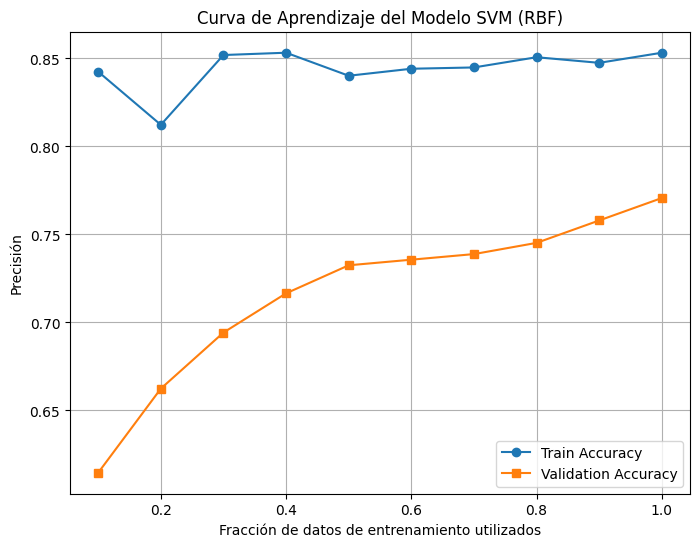

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crear el vector de fracciones de datos de entrenamiento utilizados
frac_values = np.linspace(0.1, 1.0, 10)

# Graficar la curva de aprendizaje
plt.figure(figsize=(8, 6))
plt.plot(frac_values, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(frac_values, val_accuracies, label="Validation Accuracy", marker='s')

# Configurar etiquetas y título
plt.xlabel("Fracción de datos de entrenamiento utilizados")
plt.ylabel("Precisión")
plt.title("Curva de Aprendizaje del Modelo SVM (RBF)")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


Observamos de nuevo en las curvas de aprendizaje lo que reflejan las métricas, que el modelo  muestra un rendimiento consistente tanto en el conjunto de train + validation como en el de test. Además, no hay una gran distancia entre ambas curvas, lo que refuerza la idea de que el modelo generaliza bien y no está aprendiendo de forma excesiva los detalles específicos del conjunto de entrenamiento.

Hacemos ahora uso del GridSearchCV para hacer el SVM no lineal con los mejores parámetros del SVM:

Mejores hiperparámetros: {'C': 10, 'gamma': 0.1}


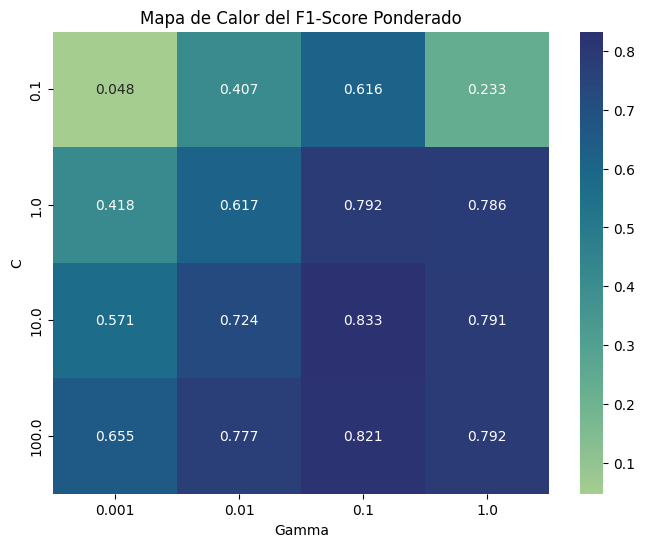

Cross-validation F1 Score (promedio): 0.8360
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.57      0.64      0.61        42
           2       0.74      0.67      0.71        43
           3       0.90      0.84      0.87        43
           4       0.87      0.90      0.89        52
           5       0.95      0.91      0.93        45
           6       0.98      1.00      0.99        48

    accuracy                           0.84       314
   macro avg       0.84      0.84      0.84       314
weighted avg       0.84      0.84      0.84       314



In [ ]:
# Definir el modelo SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Definir los valores de hiperparámetros a probar
param_grid = {
    'C': [0.1, 1, 10, 100],  # Valores pequeños -> modelo simple, grandes -> modelo más complejo
    'gamma': [0.001, 0.01, 0.1, 1]  # Valores pequeños -> más general, grandes -> más sensible
}

# Validación cruzada con GridSearch en el conjunto de entrenamiento (sin incluir validación aún)
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Representar la evolución de la puntuación F1 en función de los hiperparámetros
scores = grid_search.cv_results_['mean_test_score']
C_values = np.array(param_grid['C'])
gamma_values = np.array(param_grid['gamma'])
scores_matrix = scores.reshape(len(C_values), len(gamma_values))

plt.figure(figsize=(8, 6))
sns.heatmap(scores_matrix, annot=True, xticklabels=gamma_values, yticklabels=C_values, cmap="crest", fmt=".3f")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.title("Mapa de Calor del F1-Score Ponderado")
plt.show()

# Entrenar el mejor modelo con el conjunto de entrenamiento y validación
best_svm = SVC(kernel='rbf', probability=True, random_state=42, **best_params)

# Realizar validación cruzada para evaluar si el modelo está sobreajustando
cross_val_scores = cross_val_score(best_svm, np.vstack([X_train_scaled, X_val_scaled]),
                                   np.hstack([y_train, y_val]), cv=5, scoring='f1_weighted', n_jobs=-1)

print(f"Cross-validation F1 Score (promedio): {cross_val_scores.mean():.4f}")



best_svm.fit(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val]))

# Evaluación final en el conjunto de prueba
y_test_pred = best_svm.predict(X_test_scaled)
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))

Al comparar los resultados del modelo SVM sin la variable weight con los obtenidos con ella, observamos una disminución en el rendimiento. Lo que indica que weight tiene un impacto positivo en la clasificación de los niveles de obesidad. Aunque el modelo sigue siendo competitivo, con una precisión de 0.84 en el conjunto de test, muestra una menor capacidad para clasificar correctamente las clases intermedias (especialmente las clases 1 y 2), lo que sugiere que weight ayudaba a mejorar la discriminación en esos casos.

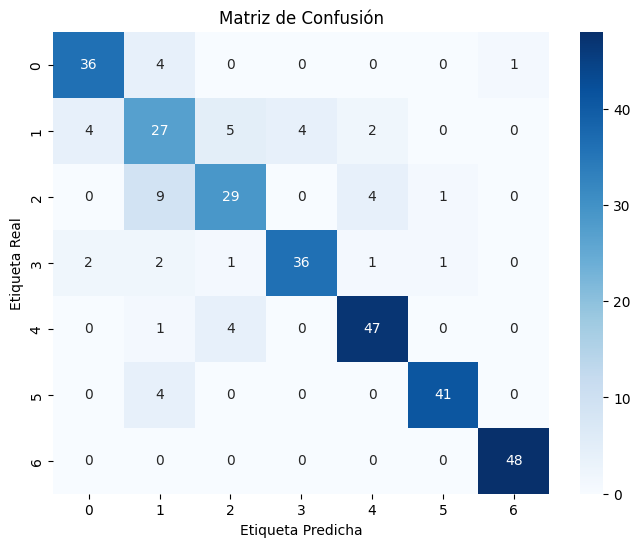

In [ ]:
# Calcular la matriz de confusión en el conjunto de prueba
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
plt.show()

La matriz de confusión muestra que el modelo sin la variable weight tiene dificultades para clasificar algunas clases de manera precisa. Por ejemplo, la clase 1 (obesidad moderada) presenta varias confusiones, con 4 muestras clasificadas como clase 0 (bajo peso) y 5 como clase 2 (sobrepeso), lo que indica que el modelo tiene dificultades para distinguir entre ciertos niveles de obesidad. Sin embargo, el desempeño en la clase 6 (obesidad extrema) sigue siendo casi perfecto, con 48 de 49 muestras correctamente clasificadas. La presencia de errores en clases intermedias sugiere que la variable weight podría haber sido importante para mejorar la precisión en esas clases.

Variable Age: 0.2054
Variable Height: 0.1768
Variable FCVC: 0.1401
Variable NCP: 0.1073
Variable CAEC: 0.0659
Variable CH2O: 0.0707
Variable FAF: 0.0672
Variable TUE: 0.0471
Variable CALC: 0.1987
Variable Gender_Male: 0.2102
Variable family_history_with_overweight_yes: 0.1417
Variable FAVC_yes: 0.0726
Variable SCC_yes: 0.0363
Variable SMOKE_yes: 0.0061
Variable MTRANS_Public_Transportation: 0.1420
Variable MTRANS_Walking: 0.0127


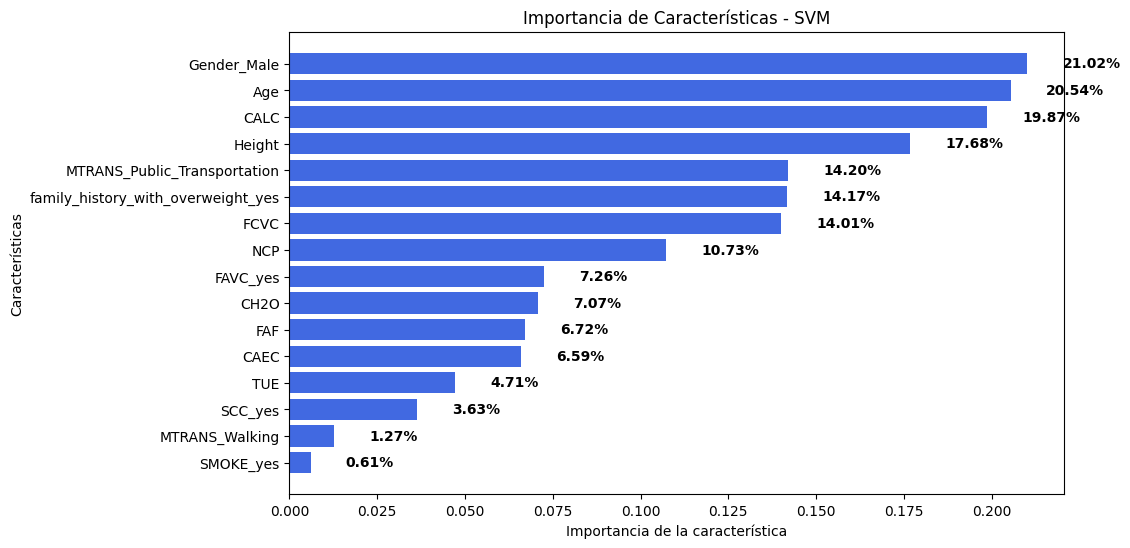

In [ ]:
# Evaluar la importancia de las características en el conjunto de prueba
result = permutation_importance(best_svm, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Imprimir la importancia de las características con los nombres de las variables
importance = result.importances_mean
for i, v in enumerate(importance):
    print(f"Variable {X_test.columns[i]}: {v:.4f}")

# Graficar la importancia de las características
indices = np.argsort(importance)[::-1]
features = X_test.columns[indices]
importance_sorted = importance[indices]

plt.figure(figsize=(10, 6))
bars = plt.barh(features, importance_sorted, color='royalblue')
plt.xlabel('Importancia de la característica')
plt.ylabel('Características')
plt.title('Importancia de Características - SVM')
plt.gca().invert_yaxis()

# Añadir el porcentaje en cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width*100:.2f}%',
             va='center', ha='left', color='black', fontweight='bold')

plt.show()

Al comparar los modelos SVM con y sin la variable peso, observamos una diferencia notable en la importancia de las características. Con la variable peso, esta tiene un impacto abrumadoramente alto (0.7086), lo que resalta su relevancia para la clasificación de los niveles de obesidad. Además, variables como Height y Gender_Male también muestran un peso significativo. Sin embargo, al quitar la variable peso del modelo, el impacto relativo de otras variables, como Age, Gender_Male, y CALC, aumentan en importancia, lo que sugiere que estos factores juegan un papel más destacado en la clasificación sin la presencia de la variable de peso. Esto indica que, aunque el modelo con peso es más preciso, la eliminación de esta variable permite una mayor evaluación de otros factores de riesgo asociados con la obesidad, aunque con una ligera disminución en el rendimiento del modelo

In [ ]:
# Calcular la precisión en el conjunto de entrenamiento + validación y el de prueba
train_val_pred = best_svm.predict(np.vstack([X_train_scaled, X_val_scaled]))
test_pred = best_svm.predict(X_test_scaled)

# Precisión
train_val_acc = precision_score(np.hstack([y_train, y_val]), train_val_pred, average='weighted')
test_acc = precision_score(y_test, test_pred, average='weighted')

# Calcular el recall en el conjunto de entrenamiento + validación y el de prueba
train_val_recall = recall_score(np.hstack([y_train, y_val]), train_val_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')

# F1 score
train_val_f1 = f1_score(np.hstack([y_train, y_val]), train_val_pred, average='weighted')
test_f1 = f1_score(y_test, test_pred, average='weighted')

# Imprimir los resultados
print(f"Train + Validation Accuracy: {train_val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Train + Validation Recall: {train_val_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Train + Validation F1 Score: {train_val_f1:.4f}")

Train + Validation Accuracy: 0.9804
Test Accuracy: 0.8444
Train + Validation Recall: 0.9803
Test Recall: 0.8408
Train + Validation F1 Score: 0.9803


Los resultados del modelo SVM sin la variable peso muestran una alta precisión, recall y F1-score en el conjunto de entrenamiento y validación (alrededor de 0.98), lo que indica que el modelo es capaz de clasificar correctamente la mayoría de los casos durante el entrenamiento. Sin embargo, al evaluarlo en el conjunto de prueba, se observa una disminución en las métricas de rendimiento, con una precisión y un recall de alrededor de 0.84. Esto sugiere que, aunque el modelo tiene un buen desempeño en los datos de entrenamiento, pierde algo de capacidad para generalizar a nuevos datos, lo que podría estar relacionado con la eliminación de la variable peso, que era un factor importante en la clasificación de los niveles de obesidad.

La principal causa de la disminución en las métricas de prueba parece ser la eliminación de la variable peso, que tenía una alta importancia en la clasificación. Al prescindir de esta característica clave, el modelo pierde capacidad para distinguir correctamente algunas clases, especialmente las intermedias, aunque sigue teniendo una buena capacidad para clasificar.

#-  PERCEPTRÓN MULTICAPA (PMC)

Ahora, vamos a trabajar con el Perceptrón Multicapa (PMC), que es un buen clasificador no lineal. El PMC tiene la capacidad de aprender representaciones no lineales gracias a su estructura de red neuronal, lo que lo convierte en una opción poderosa para tareas de clasificación. Primero, haremos uso de los valores por defecto del modelo de la librería Scikit-Learn.

El modelo MLPClassifier por defecto usa los siguientes valores:

* hidden_layer_sizes=(100,): Una sola capa oculta con 100 neuronas.
* activation='relu': Función de activación ReLU (Rectified Linear Unit).
* solver='adam': Algoritmo de optimización Adam, muy eficiente para redes neuronales.
* max_iter=200: Número máximo de iteraciones (épocas).
* random_state=None: No se especifica una semilla para la aleatoriedad (puede cambiar en cada ejecución).

In [ ]:
# Dividir en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Escalar los datos (normalización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo Perceptrón Multicapa con los parámetros por defecto
mlp_model = MLPClassifier(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
mlp_model.fit(X_train_scaled, y_train)

# Evaluación en el conjunto de validación
y_val_pred = mlp_model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy en Validación: {accuracy:.4f}")

# Si el desempeño es bueno, entrenamos con todo el set de entrenamiento + validación
mlp_model.fit(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val]))

# Evaluación final en el conjunto de prueba
y_test_pred = mlp_model.predict(X_test_scaled)
print("Classification Report en Test Set:\n", classification_report(y_test, y_test_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy en Validación: 0.7834
Classification Report en Test Set:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80        41
           1       0.68      0.40      0.51        42
           2       0.66      0.63      0.64        43
           3       0.74      0.81      0.78        43
           4       0.72      0.83      0.77        52
           5       0.91      0.93      0.92        45
           6       0.98      1.00      0.99        48

    accuracy                           0.79       314
   macro avg       0.78      0.78      0.77       314
weighted avg       0.78      0.79      0.78       314



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Evaluación en el conjunto de entrenamiento + validación
y_train_val_pred = mlp_model.predict(np.vstack([X_train_scaled, X_val_scaled]))
y_train_val_true = np.hstack([y_train, y_val])

# Calcular precisión, recall y F1 para el conjunto de entrenamiento + validación
precision_train_val = precision_score(y_train_val_true, y_train_val_pred, average='weighted')
recall_train_val = recall_score(y_train_val_true, y_train_val_pred, average='weighted')
f1_train_val = f1_score(y_train_val_true, y_train_val_pred, average='weighted')

print(f"Metricas en Entrenamiento + Validación:")
print(f"Precisión: {precision_train_val:.4f}")
print(f"Recall: {recall_train_val:.4f}")
print(f"F1-score: {f1_train_val:.4f}")

# Evaluación final en el conjunto de prueba
y_test_pred = mlp_model.predict(X_test_scaled)

# Calcular precisión, recall y F1 para el conjunto de prueba
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

print(f"\nMetricas en Test Set:")
print(f"Precisión: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-score: {f1_test:.4f}")

Metricas en Entrenamiento + Validación:
Precisión: 0.9178
Recall: 0.9185
F1-score: 0.9180

Metricas en Test Set:
Precisión: 0.7817
Recall: 0.7866
F1-score: 0.7782


Para mejorar su rendimiento, realizaremos una búsqueda de los mejores parámetros utilizando `GridSearchCV`, que nos permitirá explorar diferentes combinaciones de hiperparámetros, como el tamaño de las capas ocultas, las funciones de activación y los algoritmos de optimización. Encontrando así la configuración más adecuada con el objetivo de obtener los mejores resultados en nuestro conjunto de datos.

In [ ]:
# Dividir en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Escalar los datos (normalización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Definir modelo base
mlp_model = MLPClassifier(random_state=42)

# Definir los valores de hiperparámetros a probar (ajustados para evitar sobreajuste)
param_grid = {
    'hidden_layer_sizes': [(32,32), (64,32), (128,64)],
    'activation': ['relu'],  # ReLU suele ser mejor en redes profundas
    'solver': ['adam'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001],  # Regularización más suave
    'max_iter': [300, 500],
    'early_stopping': [True],
    'n_iter_no_change': [10]
}


# Realizar validación cruzada con GridSearch
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar el modelo con los mejores hiperparámetros y early stopping
best_mlp = MLPClassifier(
    random_state=42,
    **best_params
)

# Entrenar con el conjunto de entrenamiento
best_mlp.fit(X_train_scaled, y_train)

# Evaluación en el conjunto de validación
y_val_pred = best_mlp.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy en Validación: {accuracy:.4f}")

# Si el desempeño es bueno, entrenamos con todo el set de entrenamiento + validación
best_mlp.fit(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val]))

# Evaluación final en el conjunto de prueba
y_test_pred = best_mlp.predict(X_test_scaled)
print("Classification Report en Test Set:\n", classification_report(y_test, y_test_pred))

Mejores hiperparámetros: {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (128, 64), 'learning_rate': 'constant', 'max_iter': 300, 'n_iter_no_change': 10, 'solver': 'adam'}
Accuracy en Validación: 0.7834
Classification Report en Test Set:
               precision    recall  f1-score   support

           0       0.68      0.73      0.71        41
           1       0.69      0.43      0.53        42
           2       0.53      0.60      0.57        43
           3       0.57      0.72      0.64        43
           4       0.81      0.65      0.72        52
           5       0.88      0.93      0.90        45
           6       0.94      1.00      0.97        48

    accuracy                           0.73       314
   macro avg       0.73      0.72      0.72       314
weighted avg       0.74      0.73      0.73       314



Los hiperparámetros seleccionados para el Perceptrón Multicapa (PMC) reflejan una configuración balanceada y eficiente. La función de activación ReLU fue elegida por su capacidad para acelerar la convergencia y manejar el problema del desvanecimiento del gradiente en redes profundas. La arquitectura del modelo incluye dos capas ocultas con 128 y 64 neuronas, lo que proporciona suficiente capacidad para capturar patrones complejos sin incurrir en sobreajuste.

El modelo utiliza un learning rate constante, lo que permite un ajuste estable de los pesos durante el entrenamiento, mientras que el optimizador Adam equilibra la velocidad y la precisión en la actualización de los parámetros. Además, se empleó early stopping con un criterio de 10 iteraciones sin mejora, lo que previene un entrenamiento innecesario y ayuda a evitar el sobreajuste.

Con un máximo de 300 iteraciones, el modelo logró un accuracy en validación del 78.34%, mientras que en el conjunto de prueba alcanzó un 73% de precisión general. En general, estos hiperparámetros ofrecen una base sólida para entrenar un PMC, con posibilidades de refinamiento adicional según el comportamiento del modelo en datos reales.

In [ ]:
# Predecir para el conjunto de entrenamiento + validación
y_train_val_pred = best_mlp.predict(np.vstack([X_train_scaled, X_val_scaled]))

# Predecir para el conjunto de prueba
y_test_pred = best_mlp.predict(X_test_scaled)

# Calcular precisión, recall y F1 score para el conjunto de entrenamiento + validación
train_val_precision = precision_score(np.hstack([y_train, y_val]), y_train_val_pred, average='weighted')
train_val_recall = recall_score(np.hstack([y_train, y_val]), y_train_val_pred, average='weighted')
train_val_f1 = f1_score(np.hstack([y_train, y_val]), y_train_val_pred, average='weighted')

# Calcular precisión, recall y F1 score para el conjunto de prueba
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Imprimir los resultados
print(f"Train + Validation Precision: {train_val_precision:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Train + Validation Recall: {train_val_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Train + Validation F1 Score: {train_val_f1:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

Train + Validation Precision: 0.7670
Test Precision: 0.7362
Train + Validation Recall: 0.7650
Test Recall: 0.7293
Train + Validation F1 Score: 0.7637
Test F1 Score: 0.7254


No hay indicios de sobreajuste en el modelo, ya que las métricas de entrenamiento (Train + Validation) y prueba (Test) son bastante cercanas:

* Precisión (Precision): 76.70% (Train + Validation) vs. 73.62% (Test) → Diferencia de solo 3.08%
* Recall: 76.50% (Train + Validation) vs. 72.93% (Test) → Diferencia de 3.57%
* F1 Score: 76.37% (Train + Validation) vs. 72.54% (Test) → Diferencia de 3.83%

Si hubiera sobreajuste, esperaríamos que las métricas de entrenamiento fueran significativamente más altas que las de prueba. En este caso, las diferencias son pequeñas, lo que indica que el modelo generaliza bien a datos no vistos y no se ha ajustado excesivamente a los datos de entrenamiento.

Por lo tanto, podemos concluir que no hay sobreajuste y que el modelo mantiene un equilibrio adecuado entre entrenamiento y generalización.

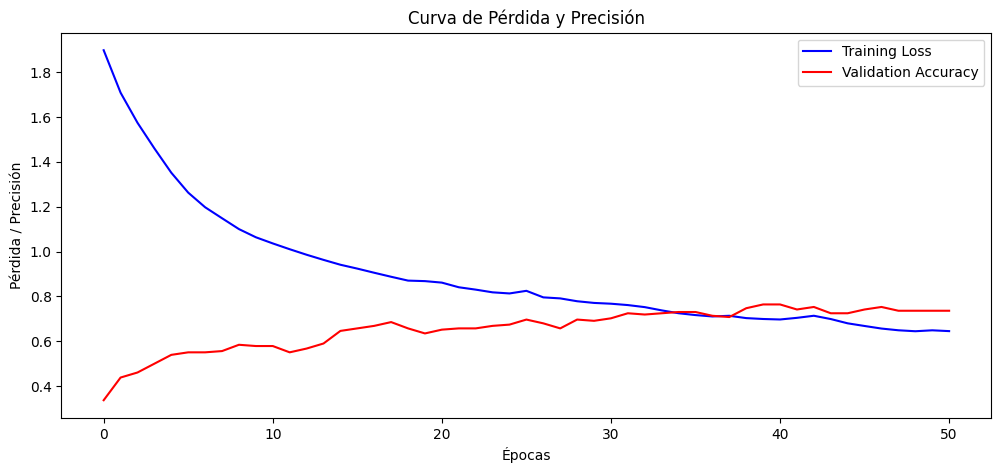

In [ ]:
# Graficar la curva de pérdida
plt.figure(figsize=(12,5))
plt.plot(best_mlp.loss_curve_, label="Training Loss", color='blue')

# Si early stopping se activó, graficamos la validación
if hasattr(best_mlp, 'validation_scores_') and best_mlp.validation_scores_ is not None and len(best_mlp.validation_scores_) > 0:
    plt.plot(best_mlp.validation_scores_, label="Validation Accuracy", color='red')
else:
    print("Early stopping did not trigger or validation scores are not available.")

plt.xlabel("Épocas")
plt.ylabel("Pérdida / Precisión")
plt.title("Curva de Pérdida y Precisión")
plt.legend()
plt.show()

La gráfica indica que el modelo ha aprendido de manera efectiva sin señales evidentes de sobreajuste, ya que la pérdida de entrenamiento disminuye progresivamente y la precisión de validación se estabiliza sin caídas bruscas. A partir de aproximadamente 40 épocas, ambos valores dejan de mejorar significativamente, lo que sugiere que entrenar por más tiempo no aportaría beneficios adicionales. Para optimizar aún más el rendimiento, se podría ajustar la tasa de aprendizaje o aplicar regularización (por ejemplo: dropout), pero en general, el modelo muestra una buena capacidad de generalización.

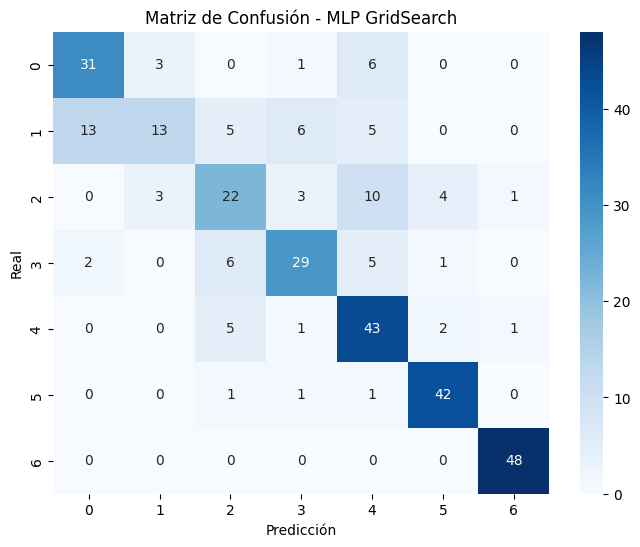

In [ ]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - MLP GridSearch')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [ ]:
# Contar el número de elementos por clase en y_test (pandas)
clases_count = y_test.value_counts()
print("Número de elementos por clase en el conjunto de prueba:")
print(clases_count)


Número de elementos por clase en el conjunto de prueba:
NObeyesdad
4    52
6    48
5    45
2    43
3    43
1    42
0    41
Name: count, dtype: int64


La matriz de confusión muestra un buen desempeño del modelo en la clasificación de patrones, con clases como la 6, 5 y 4 correctamente identificadas en la mayoría de los casos. Sin embargo, hay confusiones significativas en clases como la 1 y 2, donde los errores de clasificación se distribuyen entre varias categorías, lo que indica que los patrones en estas clases pueden ser más similares o solapados. Mejoras en la selección de características o técnicas como aumento de datos y ajuste de hiperparámetros podrían ayudar a diferenciar mejor estas clases y optimizar el rendimiento del modelo.

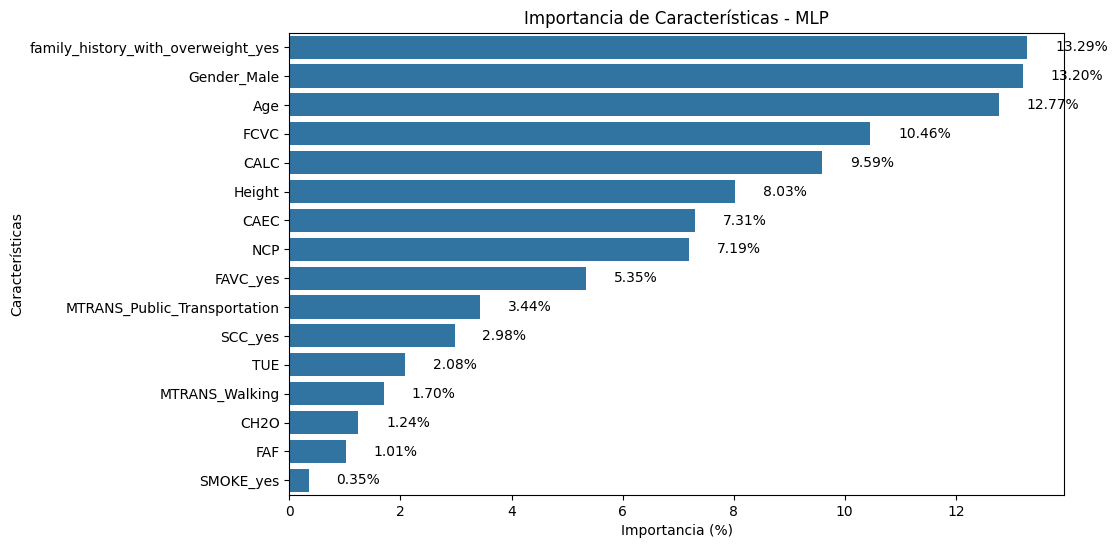

In [ ]:
# Evaluamos la importancia de las características
result = permutation_importance(best_mlp, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1) # Cambio: Usamos best_mlp directamente
importance = result.importances_mean
importance_percentage = (importance / np.sum(importance)) * 100  # Convertimos a porcentaje

# Ordenamos las características por importancia
i_sorted = np.argsort(importance_percentage)[::-1]
nombres_features = X.columns[i_sorted]
importancia_ordenada = importance_percentage[i_sorted]

# Graficamos
plt.figure(figsize=(10, 6))
sns.barplot(x=importancia_ordenada, y=nombres_features)
for i, v in enumerate(importancia_ordenada):
    plt.text(v + 0.5, i, f"{v:.2f}%", va='center', fontsize=10)
plt.xlabel("Importancia (%)")
plt.ylabel("Características")
plt.title("Importancia de Características - MLP")
plt.show()


Hacemos uso de cross-validation que es un método de regularización para evitar el sobreajuste.

In [ ]:
# Definir el modelo MLP
mlp = MLPClassifier(random_state=42, max_iter=300)  # Reducimos iteraciones para acelerar entrenamiento

# Definir los valores de hiperparámetros a probar
param_grid = {
    'hidden_layer_sizes': [(32,32), (64,32),(128,64), (256, 128)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.001],  # Tasa de aprendizaje más baja
    'alpha': [0.0001, 0.001],  # Regularización L2
    'max_iter': [300],
    'early_stopping': [True],
    'n_iter_no_change': [10]
}


# Combinamos los conjuntos de entrenamiento y validación
X_train_val_scaled = np.concatenate((X_train_scaled, X_val_scaled), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

# Realizar validación cruzada con GridSearch en el conjunto combinado
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_val_scaled, y_train_val)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Realizar validación cruzada (k-fold) con el mejor modelo encontrado
# Después de realizar la búsqueda, cross_val_score entrena el modelo en el conjunto de entrenamiento + validación utilizando validación cruzada, devolviendo la precisión (accuracy).
# Cuando se hace la validación cruzada, ya estás entrenando el modelo, pero en diferentes particiones del conjunto de datos de entrenamiento y validación
cv_scores = cross_val_score(grid_search.best_estimator_, X_train_val_scaled, y_train_val, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Evaluación final en el conjunto de prueba
y_test_pred = grid_search.best_estimator_.predict(X_test_scaled)
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))

Mejores hiperparámetros: {'activation': 'relu', 'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (256, 128), 'learning_rate_init': 0.001, 'max_iter': 300, 'n_iter_no_change': 10, 'solver': 'adam'}
Cross-Validation Accuracy: 0.8049 ± 0.0086
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.68      0.31      0.43        42
           2       0.56      0.51      0.54        43
           3       0.71      0.67      0.69        43
           4       0.61      0.83      0.70        52
           5       0.86      0.93      0.89        45
           6       0.96      1.00      0.98        48

    accuracy                           0.73       314
   macro avg       0.72      0.72      0.71       314
weighted avg       0.72      0.73      0.71       314



In [ ]:
# Predecir para el conjunto de entrenamiento + validación
y_train_val_pred = grid_search.best_estimator_.predict(np.vstack([X_train_scaled, X_val_scaled]))

# Realizar predicciones
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Calcular precisión, recall y F1 score para el conjunto de entrenamiento + validación
train_val_precision = precision_score(np.hstack([y_train, y_val]), y_train_val_pred, average='weighted')
train_val_recall = recall_score(np.hstack([y_train, y_val]), y_train_val_pred, average='weighted')
train_val_f1 = f1_score(np.hstack([y_train, y_val]), y_train_val_pred, average='weighted')

# Calcular precisión, recall y F1 score para el conjunto de prueba
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Imprimir los resultados
print(f"Train + Validation Precision: {train_val_precision:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Train + Validation Recall: {train_val_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Train + Validation F1 Score: {train_val_f1:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

Train + Validation Precision: 0.7835
Test Precision: 0.7249
Train + Validation Recall: 0.7712
Test Recall: 0.7261
Train + Validation F1 Score: 0.7666
Test F1 Score: 0.7127


Los resultados de cross-validation muestran que, a pesar del ajuste de hiperparámetros, el rendimiento en el conjunto de prueba es ligeramente inferior al de train + validation, con diferencias notables en precisión (5.87%) y F1-score (5.39%). Esto sugiere que el modelo puede estar capturando patrones específicos del conjunto de entrenamiento pero no generaliza tan bien a datos no vistos.

Esta disminución en el desempeño podría deberse a la varianza en los datos de prueba, una mayor complejidad del modelo que lo hace más sensible a los datos de entrenamiento, o incluso a un posible desequilibrio en las clases que afecta la generalización. Aunque se aplicó un ajuste con GridSearchCV, los resultados indican que el modelo aún enfrenta dificultades en ciertas clases, por lo que podrían explorarse otras técnicas como ingeniería de características, regularización o recolección de más datos representativos.

#- KNN con parámetros fijados:

El KNN es un algoritmo de aprendizaje supervisado utilizado tanto para clasificación como para regresión. En este caso lo aplicamos para un problema de clasificación.

Algoritmo:
- Seleccionar K: Elegir el número de vecinos más cercanos a considerar.
- Calcular la distancia: Determinar la distancia entre el punto nuevo y todos los puntos en el conjunto de datos.
- Encontrar K vecinos más cercanos: Ordenar las distancias y seleccionar los K más cercanos.
- La clase se asigna por mayoría de votos de los vecinos.


Distancia:
- Distancia Euclidiana: Utilizada cuando las características son continuas y están en la misma escala.
- Distancia Manhattan: Más robusta a las diferencias en escala.
- Distancia de Minkowski: Generaliza las anteriores.

Importancia de K:
- K pequeño: Modelo más flexible, pero puede sobreajustar (overfitting).
- K grande: Modelo más robusto, pero puede subajustar (underfitting).

Método de selección:
- Validación cruzada (cross-validation).
- Elección del K con mejor desempeño en métricas como accuracy o F1-score.


In [ ]:
# Separar características (X) y variable objetivo (y)
X = df.drop(columns=['NObeyesdad', 'Weight'])  # Eliminar 'Weight' de las características
y = df['NObeyesdad']  # Variable objetivo

# Dividir en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
# Escalar SOLO con los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

- n_neighbors=5: El modelo clasificará un punto basándose en las 5 muestras más cercanas a él. Un valor pequeño de k puede llevar a un modelo más sensible al ruido, mientras que un valor grande puede hacer que el modelo sea más general y menos sensible a patrones específicos.
- metric='minkowski': El modelo usará la distancia Minkowski para calcular la proximidad entre los puntos, y con p=2 (por defecto), esta es equivalente a la distancia Euclidiana. .

In [ ]:
# Definir el modelo KNN básico (sin búsqueda de hiperparámetros)
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# Evaluación en el conjunto de validación
y_val_pred = knn_model.predict(X_val_scaled)
print("Classification Report on Validation Set:\n", classification_report(y_val, y_val_pred))

Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.70      0.98      0.82        41
           1       0.58      0.27      0.37        41
           2       0.77      0.77      0.77        43
           3       0.87      0.75      0.80        44
           4       0.77      0.85      0.81        52
           5       0.79      0.93      0.85        44
           6       0.98      0.96      0.97        49

    accuracy                           0.79       314
   macro avg       0.78      0.79      0.77       314
weighted avg       0.79      0.79      0.78       314



In [ ]:
# Entrenar el modelo con el conjunto de entrenamiento completo (train + validation)
knn_model.fit(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val]))

KNeighborsClassifier()

In [ ]:
# Accuracy en el conjunto de entrenamiento + validación
train_val_accuracy = knn_model.score(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val])) * 100
print(f"Train + Validation Accuracy: {train_val_accuracy:.2f}%")

# Accuracy en el conjunto de prueba
test_accuracy = knn_model.score(X_test_scaled, y_test) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

Train + Validation Accuracy: 84.60%
Test Accuracy: 78.98%


El modelo tiene un buen desempeño en el conjunto de entrenamiento y validación No parece estar sobreajustado excesivamente, ya que la precisión no es demasiado alta en comparación con el test.

Hay una ligera caída en el rendimiento en el conjunto de prueba. Esto sugiere que el modelo generaliza de manera decente, pero aún podría mejorarse para reducir la diferencia.

In [ ]:
# Evaluación final en el conjunto de prueba
y_test_pred = knn_model.predict(X_test_scaled)
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))

# Calcular precisión, recall y F1 score para el conjunto de prueba
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Imprimir los resultados
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77        41
           1       0.67      0.43      0.52        42
           2       0.68      0.65      0.67        43
           3       0.68      0.74      0.71        43
           4       0.85      0.85      0.85        52
           5       0.86      0.98      0.92        45
           6       0.98      1.00      0.99        48

    accuracy                           0.79       314
   macro avg       0.78      0.78      0.77       314
weighted avg       0.78      0.79      0.78       314

Test Precision: 0.7839
Test Recall: 0.7898
Test F1 Score: 0.7821


Resultados obtenidos:

- La clase 6 tiene una precisión y recall cercanos al 100%, lo que indica que el modelo la distingue con mucha claridad. La clase 5 también muestra un fuerte rendimiento (F1-score = 0.92), con alta precisión y recall. La clase 4 mantiene un F1-score sólido (0.85) con buen balance entre precisión y recall.
- La clase 1 tiene el peor desempeño (F1-score = 0.52) debido a un bajo recall (0.43), lo que sugiere que muchos ejemplos de esta clase están siendo clasificados incorrectamente en otras categorías. La clase 2 también tiene un rendimiento moderado (F1-score = 0.67), aunque no tan crítico como la clase 1.

- Macro avg (~0.78 en precisión, recall y F1-score): Indica un rendimiento equilibrado entre clases, sin que el modelo favorezca en exceso una categoría sobre otra.
- Weighted avg (~0.78): Como las clases tienen tamaños diferentes, esta métrica ponderada confirma que el rendimiento general es bastante estable.

- Test Precision (0.7839), Recall (0.7898) y F1-score (0.7821): La precisión y el recall están bien balanceados, lo que significa que el modelo no comete demasiados falsos positivos ni falsos negativos en general. El F1-score promedio de 0.78 sugiere que el modelo logra un buen equilibrio entre la detección correcta y la reducción de errores.

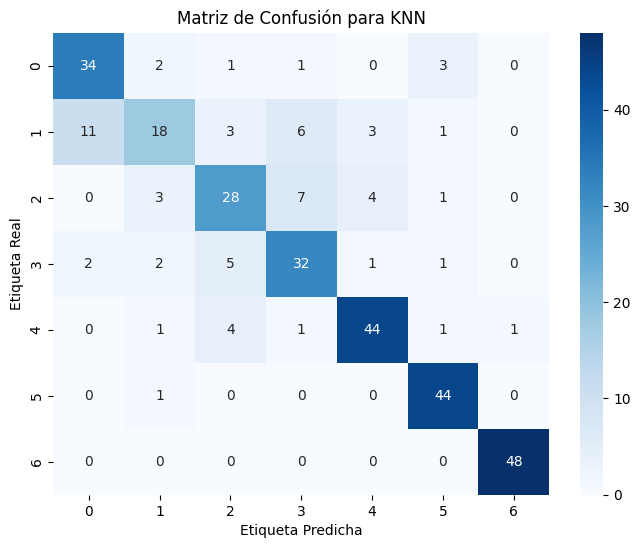

In [ ]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión para KNN")
plt.show()

El modelo KNN tiene un desempeño razonable, ya que la mayoría de las predicciones correctas están en la diagonal principal. Sin embargo, hay algunos errores de clasificación en clases cercanas, lo que sugiere que el modelo podría beneficiarse de un mejor ajuste de hiperparámetros o técnicas adicionales como la selección de características o normalización.

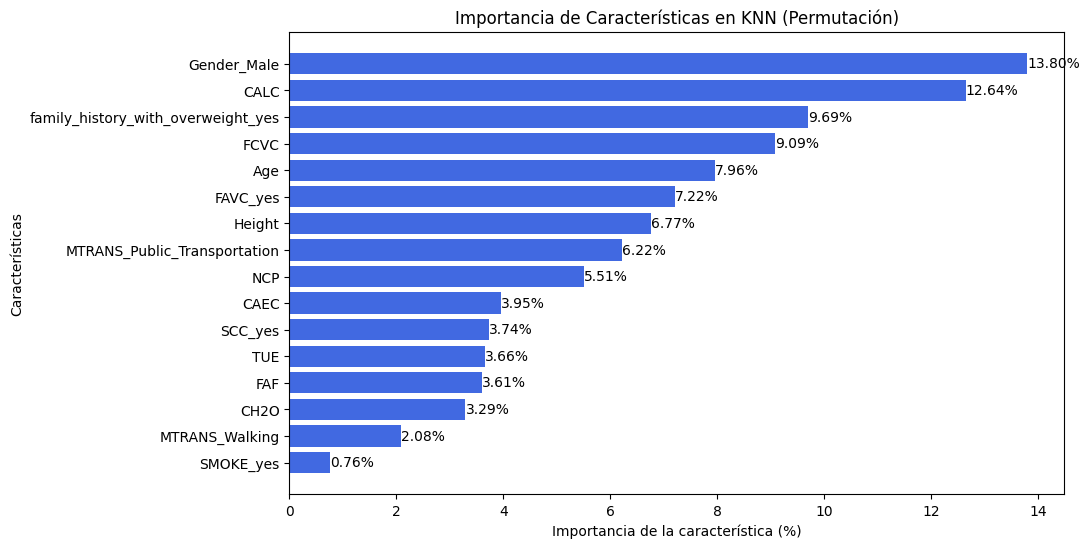

In [ ]:
# Importancia de variables usando permutación
perm_importance = permutation_importance(knn_model, X_test_scaled, y_test, scoring='accuracy', n_repeats=10, random_state=42)
feature_importances = perm_importance.importances_mean

# Normalizar importancias para que sumen 100
feature_importances = (feature_importances / feature_importances.sum()) * 100

# Obtener nombres de las variables
feature_names = X.columns

# Ordenar las características por importancia descendente
indices = np.argsort(feature_importances)[::-1]
sorted_features = feature_names[indices]
sorted_importance = feature_importances[indices]

# Graficar la importancia de las variables en horizontal con valores numéricos
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_features, sorted_importance, color='royalblue')
plt.xlabel("Importancia de la característica (%)")
plt.ylabel("Características")
plt.title("Importancia de Características en KNN (Permutación)")
plt.gca().invert_yaxis()

# Agregar etiquetas numéricas a las barras
for bar, importance in zip(bars, sorted_importance):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.2f}%', va='center')

plt.show()

- Gender_Male (13.80%) y CALC (12.64%) son las variables que más influyen en el modelo. Historial familiar de sobrepeso (9.69%) y Frecuencia de consumo de vegetales (FCVC - 9.09%) también tienen un impacto significativo. Esto sugiere que género, consumo de alcohol, antecedentes familiares y dieta son factores clave en la clasificación.

- Edad (7.96%), FAVC (7.22%) y altura (6.77%) tienen una contribución notable. Uso del transporte público (6.22%) y número de comidas al día (5.51%) también son relevantes.

- Tabaquismo (SMOKE_yes - 0.76%) tiene la menor importancia, lo que sugiere que no influye mucho en la clasificación. Caminar como medio de transporte (MTRANS_Walking - 2.08%) y consumo de agua (CH2O - 3.29%) también tienen baja relevancia.

El modelo KNN se basa fuertemente en factores de estilo de vida (alcohol, dieta), antecedentes familiares y género para realizar predicciones. Algunas variables esperadas, como fumar o la hidratación, tienen poca influencia, lo que podría indicar que su relación con la variable objetivo no es fuerte en este dataset.

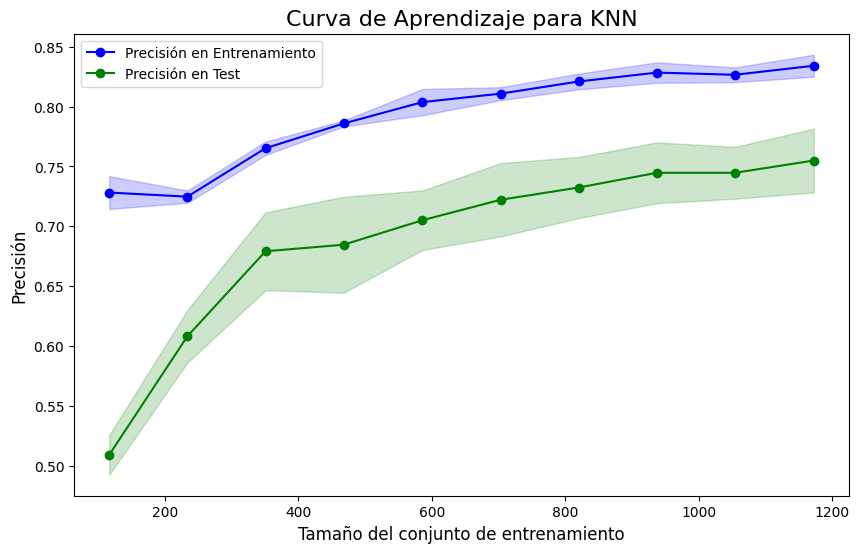

In [ ]:
# Obtener las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    knn_model, X_train_scaled, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proporción de los datos de entrenamiento
    cv=5,                                   # Validación cruzada con 5 particiones
    n_jobs=-1                                # Usar todos los núcleos disponibles
)

# Calcular el promedio y la desviación estándar de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Precisión en Entrenamiento', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Precisión en Test', color='green', marker='o')

# Rellenar con color las áreas alrededor de las líneas
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

# Etiquetas y título
plt.title("Curva de Aprendizaje para KNN", fontsize=16)
plt.xlabel("Tamaño del conjunto de entrenamiento", fontsize=12)
plt.ylabel("Precisión", fontsize=12)
plt.legend()

# Mostrar la gráfica
plt.show()

Tendencia de la Precisión en Entrenamiento: Comienza alta con pocos datos y disminuye levemente conforme se agregan más muestras. Se estabiliza alrededor de 0.83 - 0.85, lo que indica que el modelo aprende y se ajusta bien.

Tendencia de la Precisión en Test: Empieza baja (~0.50) con pocos datos y mejora rápidamente conforme aumenta el tamaño del conjunto de entrenamiento.
Se estabiliza alrededor de 0.75, aunque todavía existe una brecha con la curva de entrenamiento.

Brecha entre Entrenamiento y Test: Existe una diferencia notable entre ambas curvas, especialmente cuando hay más datos. Esto sugiere que el modelo puede estar sufriendo de overfitting (sobreajuste), ya que la precisión en entrenamiento es significativamente mayor que en prueba.

Las partes sombreadas alrededor de las curvas representan la variabilidad o incertidumbre de la métrica de precisión. Generalmente, estas sombras indican el intervalo de confianza o la desviación estándar de la precisión en cada punto del conjunto de entrenamiento:
- Si la sombra es estrecha: significa que los resultados son más consistentes y estables.
- Si la sombra es ancha: indica mayor variabilidad, es decir, que la precisión cambia significativamente dependiendo de la partición del conjunto de datos.

#- KNN modificando parámetros:

In [ ]:
# Separar características (X) y variable objetivo (y), sin la columna 'weight'
X = df.drop(columns=['NObeyesdad', 'Weight'])  # Eliminar 'Weight' de las características
y = df['NObeyesdad']  # Variable objetivo

# Dividir en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)  # Conjunto de entrenamiento
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)  # Conjuntos de validación y prueba

# Escalar SOLO con los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

- n_neighbors (Número de vecinos): Este hiperparámetro define el número de vecinos más cercanos que se considerarán para predecir la clase de una muestra nueva.
- metric (Métrica de distancia): Este parámetro define qué distancia se utilizará para calcular la cercanía entre los puntos de datos. KNN se basa en calcular la distancia entre puntos y luego elegir los más cercanos. .
- weights (Pesos de los vecinos): Este hiperparámetro define cómo se ponderan las contribuciones de los vecinos a la predicción de la clase. uniform: Todos los vecinos tienen el mismo peso, es decir, contribuyen de igual manera a la predicción.

In [ ]:
# Definir el modelo KNN
knn_model = KNeighborsClassifier()

# Definir los valores de hiperparámetros a probar
param_grid = {
    'n_neighbors': [5, 7, 9, 11, 15],  # Número de vecinos a considerar
    'metric': ['minkowski'],  # Diferentes métricas de distancia
    'weights': ['uniform'],  # Diferentes estrategias para pesar los vecinos
}

# Validación cruzada con GridSearch en el conjunto de entrenamiento
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}


El mejor modelo seleccionado corresponde al modelo preestablecido, ya explicado anteriormente.

In [ ]:
# Entrenar el mejor modelo con el conjunto de entrenamiento completo (train + validation)
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val]))

KNeighborsClassifier()

In [ ]:
# Predicción en el conjunto de prueba
y_test_pred = best_knn.predict(X_test_scaled)

# Predicción en el conjunto de entrenamiento + validación
y_train_val_pred = best_knn.predict(np.vstack([X_train_scaled, X_val_scaled]))

# Calcular la precisión en el conjunto de entrenamiento + validación
train_val_accuracy = accuracy_score(np.hstack([y_train, y_val]), y_train_val_pred)

# Calcular la precisión en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)

# Reporte de clasificación
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))

# Mostrar accuracies
print(f"Train + Validation Accuracy: {train_val_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77        41
           1       0.67      0.43      0.52        42
           2       0.68      0.65      0.67        43
           3       0.68      0.74      0.71        43
           4       0.85      0.85      0.85        52
           5       0.86      0.98      0.92        45
           6       0.98      1.00      0.99        48

    accuracy                           0.79       314
   macro avg       0.78      0.78      0.77       314
weighted avg       0.78      0.79      0.78       314

Train + Validation Accuracy: 84.60%
Test Accuracy: 78.98%


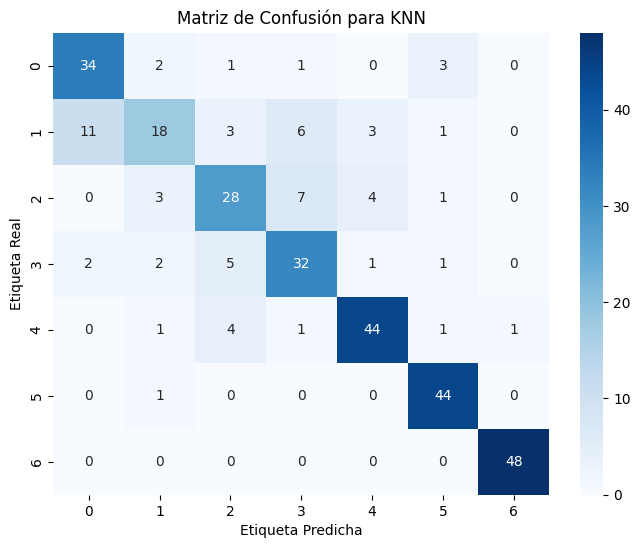

In [ ]:
# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión para KNN")
plt.show()

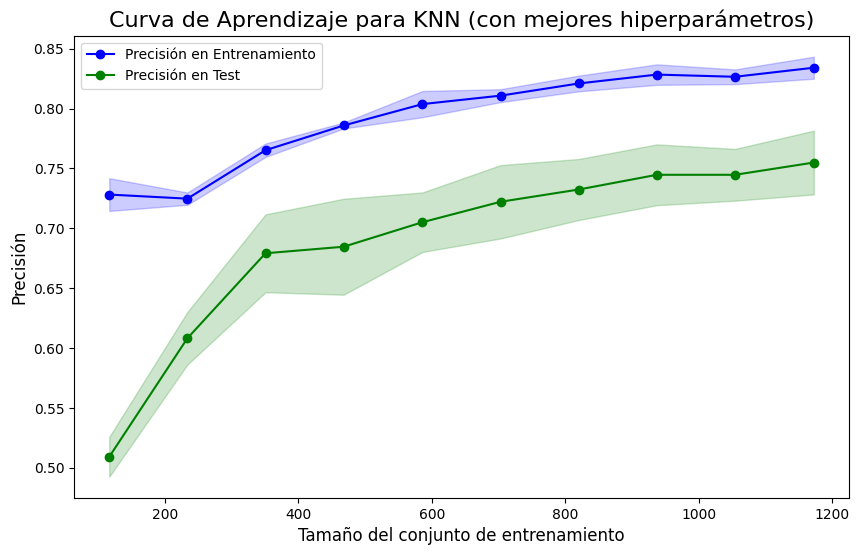

In [ ]:
# Obtener las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    best_knn, X_train_scaled, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proporción de los datos de entrenamiento
    cv=5,                                   # Validación cruzada con 5 particiones
    n_jobs=-1                                # Usar todos los núcleos disponibles
)

# Calcular el promedio y la desviación estándar de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Precisión en Entrenamiento', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Precisión en Test', color='green', marker='o')

# Rellenar con color las áreas alrededor de las líneas
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

# Etiquetas y título
plt.title("Curva de Aprendizaje para KNN (con mejores hiperparámetros)", fontsize=16)
plt.xlabel("Tamaño del conjunto de entrenamiento", fontsize=12)
plt.ylabel("Precisión", fontsize=12)
plt.legend()

# Mostrar la gráfica
plt.show()

#- Random Forest con parámetros preseleccionados:

Los árboles de decisión son clasificadores no lineales que dividen el espacio de características en regiones mediante reglas basadas en las variables más relevantes. Sin embargo, un solo árbol puede ser sensible a pequeñas variaciones en los datos, lo que lleva a sobreajuste. Para mejorar su estabilidad y precisión, se introduce Random Forest, un método de ensamble que combina múltiples árboles de decisión entrenados con diferentes subconjuntos de datos y características.

Random Forest mejora la generalización al reducir la varianza del modelo mediante el promedio de predicciones de varios árboles independientes. Utiliza muestreo aleatorio (bootstrap) para crear conjuntos de entrenamiento variados y selecciona un subconjunto aleatorio de características en cada división del árbol, lo que evita que un solo predictor domine el aprendizaje. Este enfoque lo hace robusto, preciso y menos propenso al sobreajuste en comparación con un solo árbol de decisión.

In [ ]:
# Separar características (X) y variable objetivo (y), sin la columna 'Weight'
X = df.drop(columns=['NObeyesdad', 'Weight'])  # Eliminar 'Weight' de las características
y = df['NObeyesdad']  # Variable objetivo

# Dividir en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
# Escalar SOLO con los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

- n_estimators=200 (Número de árboles en el bosque): Este parámetro define cuántos árboles (clasificadores) compondrán el bosque aleatorio. Al aumentar el número de árboles, el modelo se vuelve más robusto y suele reducir la varianza y el riesgo de sobreajuste. Sin embargo, también puede aumentar el tiempo de cómputo.
- max_depth=10 (Profundidad máxima de los árboles): Define la máxima profundidad de cada árbol. La profundidad es el número de divisiones que un árbol puede hacer desde la raíz hasta una hoja (el nodo final). Limitar la profundidad ayuda a evitar el sobreajuste (overfitting). Si los árboles son demasiado profundos, pueden aprender patrones muy específicos del conjunto de entrenamiento (y no generalizar bien a nuevos datos).
- min_samples_split=2 (Número mínimo de muestras para dividir un nodo): Este parámetro especifica el número mínimo de muestras que un nodo debe tener para poder ser dividido en nodos hijos. Si un nodo tiene menos muestras que este valor, no se realizará una división adicional. Este parámetro controla el crecimiento del árbol y la profundidad de la división. Si se usa un valor bajo como 2, los árboles pueden tener más divisiones, lo que podría aumentar la varianza y el riesgo de sobreajuste.
- min_samples_leaf=1 (Número mínimo de muestras en una hoja): Este parámetro define el número mínimo de muestras que un nodo hoja (el nodo final de un árbol) debe contener. Si min_samples_leaf=1, cada hoja puede contener solo un ejemplo del conjunto de entrenamiento, lo que podría llevar a árboles muy específicos (posiblemente sobreajustados). Usar un valor mayor asegura que las hojas no se vuelvan demasiado específicas, promoviendo una mayor generalización. Esto puede ayudar a reducir el sobreajuste.
- max_features='auto' (Número máximo de características a considerar para cada división): Este parámetro especifica el número máximo de características que se considerarán en cada división de un árbol.
- random_state=42 (Semilla aleatoria para la reproducibilidad): Este parámetro se usa para fijar la semilla del generador de números aleatorios, lo que permite obtener los mismos resultados cada vez que se ejecute el código.

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,             # Aumentar el número de árboles para mayor robustez
    max_depth=10,                  # Reducir la profundidad de los árboles
    min_samples_split=2,         # Requerir al menos 10 muestras para dividir un nodo
    min_samples_leaf=1,           # Al menos 5 muestras por hoja
    max_features='sqrt',          # Considerar log2 características en cada división
    class_weight='balanced',      # Ajustar pesos por clases desbalanceadas
    random_state=42
)

rf_model.fit(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val]))

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

In [ ]:
# Definir el modelo Random Forest básico (sin búsqueda de hiperparámetros)
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [ ]:
# Evaluación en el conjunto de validación
y_val_pred = rf_model.predict(X_val_scaled)
print("Classification Report on Validation Set:\n", classification_report(y_val, y_val_pred))

Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        41
           1       0.65      0.78      0.71        41
           2       0.88      0.65      0.75        43
           3       0.88      0.80      0.83        44
           4       0.76      0.92      0.83        52
           5       0.95      0.95      0.95        44
           6       1.00      0.96      0.98        49

    accuracy                           0.86       314
   macro avg       0.87      0.85      0.85       314
weighted avg       0.87      0.86      0.86       314



In [ ]:
# Entrenar el modelo con el conjunto de entrenamiento completo (train + validation)
rf_model.fit(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val]))

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [ ]:
# Accuracy en el conjunto de entrenamiento + validación
train_val_accuracy = rf_model.score(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val])) * 100
print(f"Train + Validation Accuracy: {train_val_accuracy:.2f}%")

# Accuracy en el conjunto de prueba
test_accuracy = rf_model.score(X_test_scaled, y_test) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Imprimir el classification report en el conjunto de prueba
print("\nClassification Report en Test Set:\n", classification_report(y_test, rf_model.predict(X_test_scaled)))


Train + Validation Accuracy: 98.54%
Test Accuracy: 83.76%

Classification Report en Test Set:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82        41
           1       0.68      0.62      0.65        42
           2       0.74      0.67      0.71        43
           3       0.77      0.84      0.80        43
           4       0.87      0.92      0.90        52
           5       0.90      0.96      0.92        45
           6       1.00      1.00      1.00        48

    accuracy                           0.84       314
   macro avg       0.83      0.83      0.83       314
weighted avg       0.83      0.84      0.84       314



In [ ]:
# Accuracy en el conjunto de entrenamiento + validación
train_val_accuracy = rf_model.score(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val])) * 100
print(f"Train + Validation Accuracy: {train_val_accuracy:.2f}%")

# Accuracy en el conjunto de prueba
test_accuracy = rf_model.score(X_test_scaled, y_test) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

Train + Validation Accuracy: 98.54%
Test Accuracy: 83.76%


Los resultados del Random Forest con parámetros por defecto muestran un posible sobreajuste, ya que la accuracy en Train + Validation (98.54%) es significativamente mayor que en el Test Set (83.76%). Esta brecha indica que el modelo ha aprendido muy bien los patrones en el entrenamiento, pero su capacidad de generalización a datos no vistos es más limitada.

El sobreajuste es común en árboles de decisión y Random Forest con demasiadas profundidades, ya que estos modelos pueden memorizar los datos de entrenamiento en lugar de encontrar patrones generales. Para mitigar este problema, se podrían ajustar hiperparámetros clave como número de árboles (n_estimators), profundidad máxima (max_depth) o la cantidad mínima de muestras por nodo (min_samples_split), además de explorar técnicas como reducción de dimensiones o eliminación de variables irrelevantes.

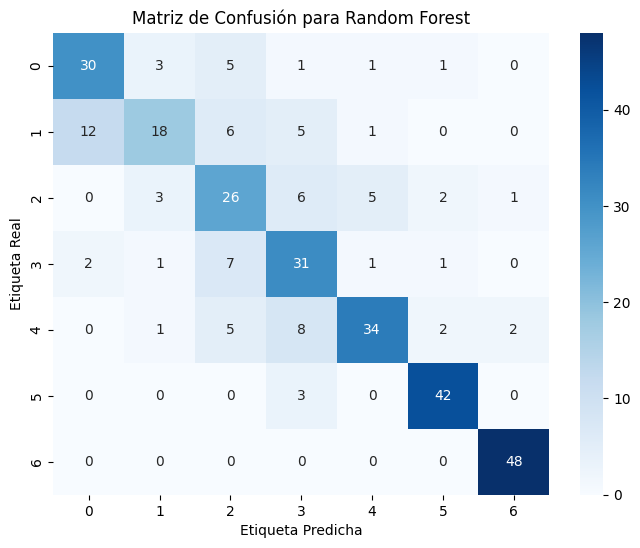

In [ ]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión para Random Forest")
plt.show()

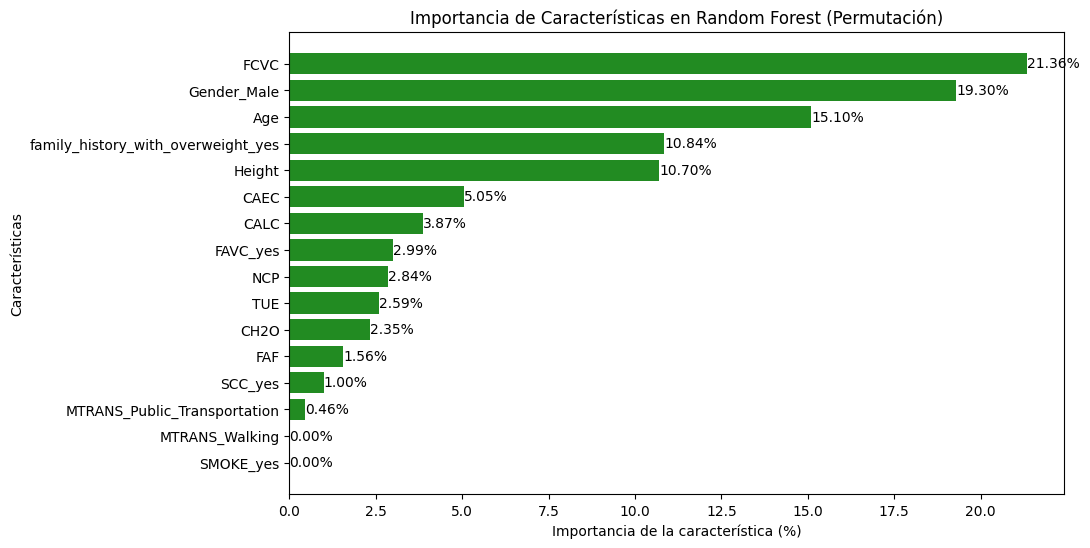

In [ ]:
# Importancia de variables usando permutación
perm_importance = permutation_importance(rf_model, X_test_scaled, y_test, scoring='accuracy', n_repeats=10, random_state=42)
feature_importances = perm_importance.importances_mean

# Normalizar importancias para que sumen 100
feature_importances = (feature_importances / feature_importances.sum()) * 100

# Obtener nombres de las variables
feature_names = X.columns

# Ordenar las características por importancia descendente
indices = np.argsort(feature_importances)[::-1]
sorted_features = feature_names[indices]
sorted_importance = feature_importances[indices]

# Graficar la importancia de las variables en horizontal con valores numéricos
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_features, sorted_importance, color='forestgreen')
plt.xlabel("Importancia de la característica (%)")
plt.ylabel("Características")
plt.title("Importancia de Características en Random Forest (Permutación)")
plt.gca().invert_yaxis()

# Agregar etiquetas numéricas a las barras
for bar, importance in zip(bars, sorted_importance):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.2f}%', va='center')

plt.show()

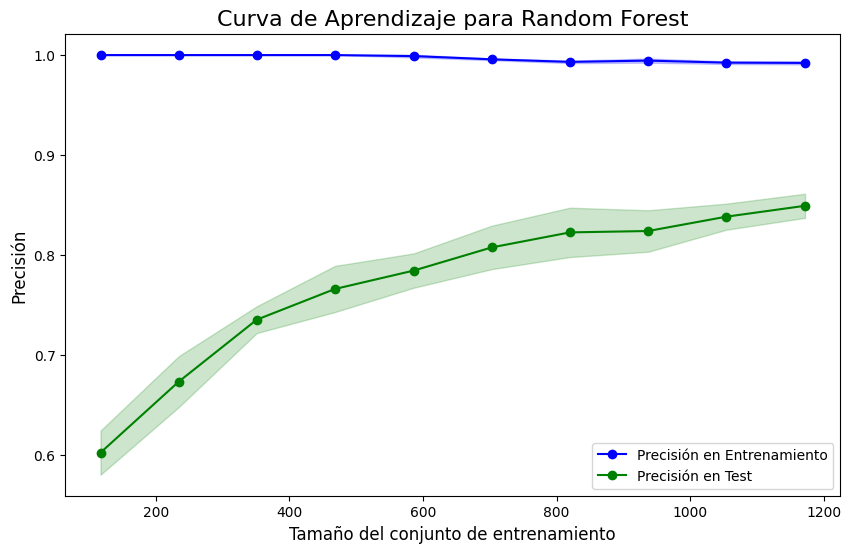

In [ ]:
# Obtener las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train_scaled, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proporción de los datos de entrenamiento
    cv=5,                                   # Validación cruzada con 5 particiones
    n_jobs=-1                                # Usar todos los núcleos disponibles
)

# Calcular el promedio y la desviación estándar de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Precisión en Entrenamiento', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Precisión en Test', color='green', marker='o')

# Rellenar con color las áreas alrededor de las líneas
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

# Etiquetas y título
plt.title("Curva de Aprendizaje para Random Forest", fontsize=16)
plt.xlabel("Tamaño del conjunto de entrenamiento", fontsize=12)
plt.ylabel("Precisión", fontsize=12)
plt.legend()

# Mostrar la gráfica
plt.show()

Las preguntas que hace un árbol de decisión en un modelo de Random Forest no son aleatorias; están basadas en las características de los datos y en cómo mejor dividirlos para hacer una predicción más precisa. El proceso es estructurado y se basa en medidas estadísticas como la impureza de Gini o la entropía, que ayudan a determinar qué pregunta hacer en cada nodo.

Cada "nodo" del árbol representa una pregunta sobre una característica particular del conjunto de datos. Estas preguntas tienen como objetivo dividir el conjunto de datos en subgrupos más pequeños y homogéneos. El proceso se repite en cada nodo, creando más divisiones hasta que se alcanza un punto en el que no se puede dividir más.

Aunque los árboles de Random Forest pueden parecer que generan decisiones aleatorias por el hecho de ser modelos basados en múltiples árboles independientes, las preguntas en cada uno de esos árboles son estratégicas. Están diseñadas para organizar y separar los datos de la mejor manera posible, con el fin de hacer predicciones lo más precisas posibles.

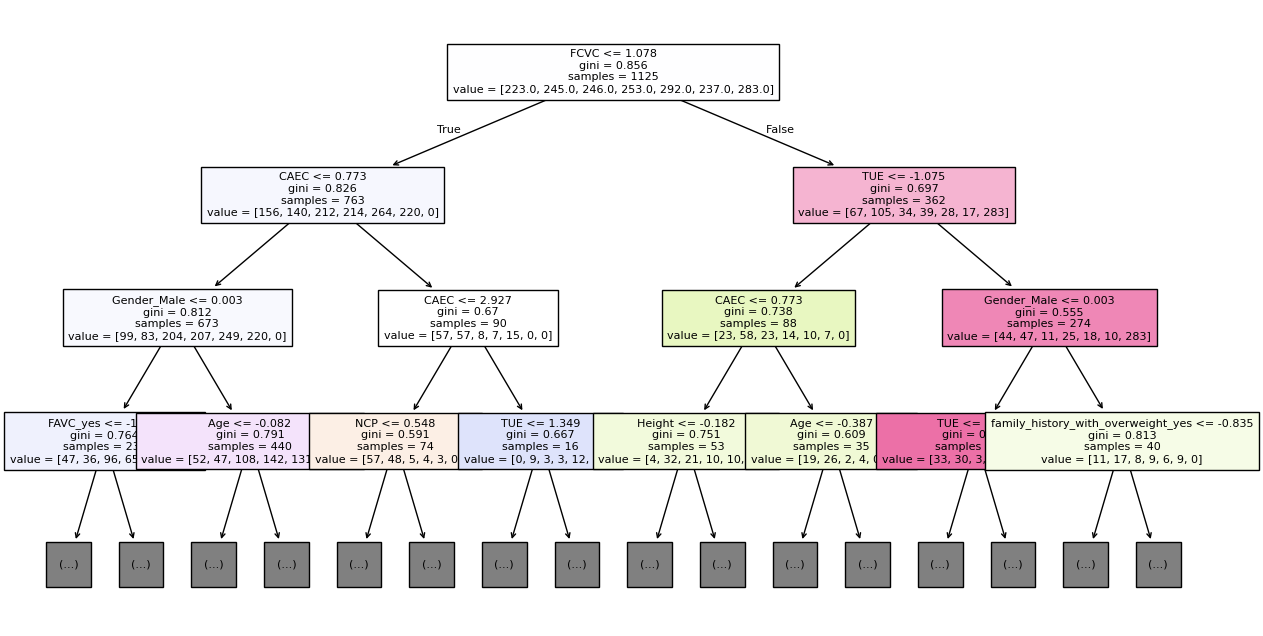

|--- FCVC <= 1.08
|   |--- CAEC <= 0.77
|   |   |--- Gender_Male <= 0.00
|   |   |   |--- FAVC_yes <= -1.20
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- FAVC_yes >  -1.20
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- Gender_Male >  0.00
|   |   |   |--- Age <= -0.08
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- Age >  -0.08
|   |   |   |   |--- truncated branch of depth 7
|   |--- CAEC >  0.77
|   |   |--- CAEC <= 2.93
|   |   |   |--- NCP <= 0.55
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- NCP >  0.55
|   |   |   |   |--- truncated branch of depth 6
|   |   |--- CAEC >  2.93
|   |   |   |--- TUE <= 1.35
|   |   |   |   |--- truncated branch of depth 6
|   |   |   |--- TUE >  1.35
|   |   |   |   |--- truncated branch of depth 4
|--- FCVC >  1.08
|   |--- TUE <= -1.07
|   |   |--- CAEC <= 0.77
|   |   |   |--- Height <= -0.18
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- Height >  -0.18
|

In [ ]:
# Acceder directamente a un árbol del bosque (por ejemplo, el primero)
arbol_ejemplo = rf_model.estimators_[0]

# Graficar el árbol
plt.figure(figsize=(15, 8))
plot_tree(arbol_ejemplo, feature_names=X.columns.tolist(), filled=True, fontsize=8, max_depth=3)
plt.show()

print(export_text(arbol_ejemplo, feature_names=X.columns.tolist(), max_depth=3))

# Random Forest cambiando parametros:

Ahora, para mejorar el rendimiento del modelo de Random Forest que utilizamos inicialmente, planeo probar un Random Forest con GridSearch. Este enfoque nos permitirá optimizar los hiperparámetros del modelo, como el número de árboles (n_estimators), la profundidad máxima de los árboles (max_depth), el número mínimo de muestras para dividir un nodo (min_samples_split) y el número mínimo de muestras en una hoja (min_samples_leaf), entre otros.

Al realizar una búsqueda en una cuadrícula de hiperparámetros posibles, podemos encontrar la combinación que maximice el rendimiento del modelo en términos de precisión, recall y otras métricas importantes. Esto debería resultar en un modelo más robusto y optimizado, mejorando aún más la capacidad de clasificación de las personas según su nivel de sobrepeso.

In [ ]:
# Separar características (X) y variable objetivo (y), sin la columna 'Weight'
X = df.drop(columns=['NObeyesdad', 'Weight'])
y = df['NObeyesdad']

# Dividir en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Escalar SOLO con los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Usar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Definir los parámetros para mejorar el sobreajuste
param_grid = {
    'n_estimators': [100, 150],  # Menos árboles para reducir sobreajuste
    'max_depth': [10, 15],        # Limitar la profundidad para evitar árboles muy grandes
    'min_samples_split': [4, 6],  # Mayor número de muestras para dividir un nodo
    'min_samples_leaf': [2, 3],   # Asegura que las hojas tengan más ejemplos
    'max_features': ['sqrt', 'log2'],  # Número limitado de características para cada división
    'bootstrap': [True]           # Usar bootstrap para el muestreo aleatorio de los árboles
}

# Búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Entrenar el modelo con el conjunto de entrenamiento balanceado
grid_search.fit(X_train_resampled, y_train_resampled)
print("Mejores hiperparámetros:", grid_search.best_params_)

# Entrenar el modelo con los mejores parámetros
best_rf = grid_search.best_estimator_

# Concatenar entrenamiento y validación
X_train_val = np.vstack([X_train_resampled, X_val_scaled])
y_train_val = np.hstack([y_train_resampled, y_val])

# Entrenar el modelo con train + val
best_rf.fit(X_train_val, y_train_val)

# Precisión en entrenamiento + validación
train_val_accuracy = best_rf.score(X_train_val, y_train_val) * 100
print(f"\n Precisión en Entrenamiento + Validación: {train_val_accuracy:.2f}%")

# Predicciones en entrenamiento + validación
y_train_val_pred = best_rf.predict(X_train_val)

# Calcular las métricas en entrenamiento + validación
precision_train_val, recall_train_val, f1_train_val, _ = precision_recall_fscore_support(y_train_val, y_train_val_pred, average='weighted')

# Mostrar las métricas
print("\nMétricas en Entrenamiento + Validación:")
print(f"Precisión: {precision_train_val:.4f}")
print(f"Recall: {recall_train_val:.4f}")
print(f"F1-score: {f1_train_val:.4f}")

# Precisión en test
test_accuracy = best_rf.score(X_test_scaled, y_test) * 100
print(f"\nPrecisión en Test: {test_accuracy:.2f}%")

# Predicciones en test
y_test_pred = best_rf.predict(X_test_scaled)

# Calcular las métricas en test
precision_test, recall_test, f1_test, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

# Mostrar las métricas
print("\nMétricas en Test Set:")
print(f"Precisión: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-score: {f1_test:.4f}")

Mejores hiperparámetros: {'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150}

 Precisión en Entrenamiento + Validación: 98.47%

Métricas en Entrenamiento + Validación:
Precisión: 0.9854
Recall: 0.9847
F1-score: 0.9848

Precisión en Test: 85.99%

Métricas en Test Set:
Precisión: 0.8605
Recall: 0.8599
F1-score: 0.8588


In [ ]:
# Reporte de clasificación en test
print("\nReporte de Clasificación en Test Set:")
print(classification_report(y_test, y_test_pred))


Reporte de Clasificación en Test Set:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.71      0.76      0.74        42
           2       0.81      0.67      0.73        43
           3       0.78      0.84      0.81        43
           4       0.89      0.90      0.90        52
           5       0.92      0.98      0.95        45
           6       1.00      1.00      1.00        48

    accuracy                           0.86       314
   macro avg       0.86      0.85      0.85       314
weighted avg       0.86      0.86      0.86       314



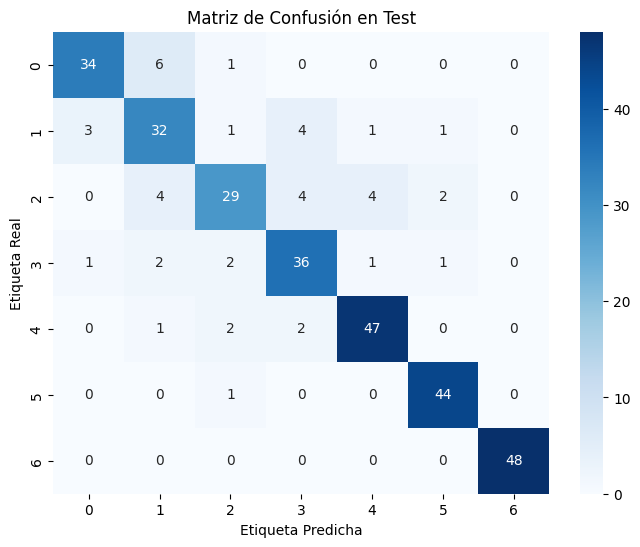

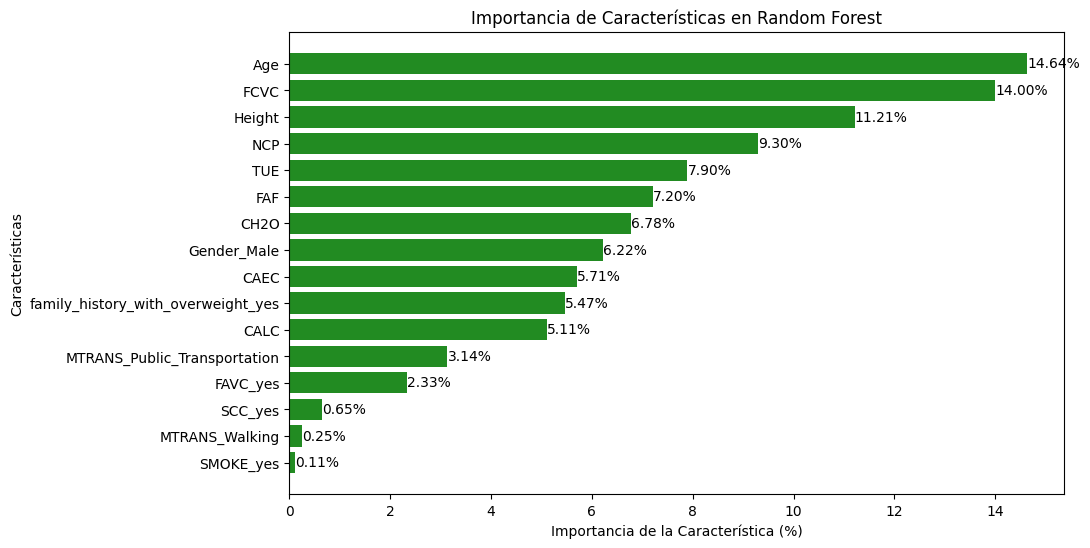

In [ ]:
# Predicciones en test
y_test_pred = best_rf.predict(X_test_scaled)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión en Test")
plt.show()

# Importancia de variables usando el modelo Random Forest
importances = best_rf.feature_importances_

# Normalizar importancias para que sumen 100
importances = (importances / importances.sum()) * 100

# Obtener nombres de las variables
feature_names = X.columns

# Ordenar las características por importancia descendente
indices = np.argsort(importances)[::-1]
sorted_features = feature_names[indices]
sorted_importance = importances[indices]

# Graficar la importancia de las variables
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_features, sorted_importance, color='forestgreen')
plt.xlabel("Importancia de la Característica (%)")
plt.ylabel("Características")
plt.title("Importancia de Características en Random Forest")
plt.gca().invert_yaxis()

# Agregar etiquetas numéricas a las barras
for bar, importance in zip(bars, sorted_importance):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.2f}%', va='center')

plt.show()


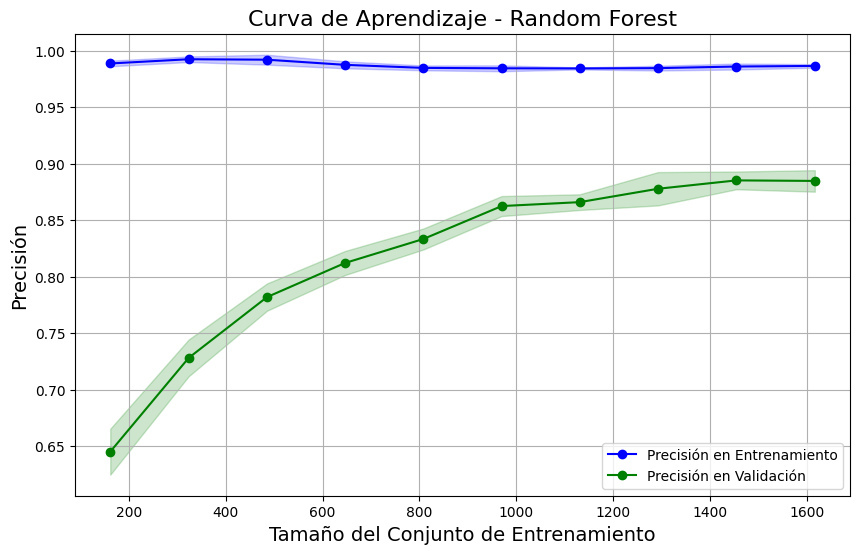

In [ ]:
# Calcular la curva de aprendizaje para el modelo Random Forest
train_sizes, train_scores, val_scores = learning_curve(
    best_rf, X_train_val, y_train_val, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calcular las medias y desviaciones estándar de las puntuaciones
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))

# Curva de entrenamiento
plt.plot(train_sizes, train_mean, label="Precisión en Entrenamiento", color="blue", marker="o")

# Curva de validación
plt.plot(train_sizes, val_mean, label="Precisión en Validación", color="green", marker="o")

# Rellenar áreas de error
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="green", alpha=0.2)

# Etiquetas y título
plt.title("Curva de Aprendizaje - Random Forest", fontsize=16)
plt.xlabel("Tamaño del Conjunto de Entrenamiento", fontsize=14)
plt.ylabel("Precisión", fontsize=14)
plt.legend(loc="best")
plt.grid(True)

# Mostrar gráfico
plt.show()


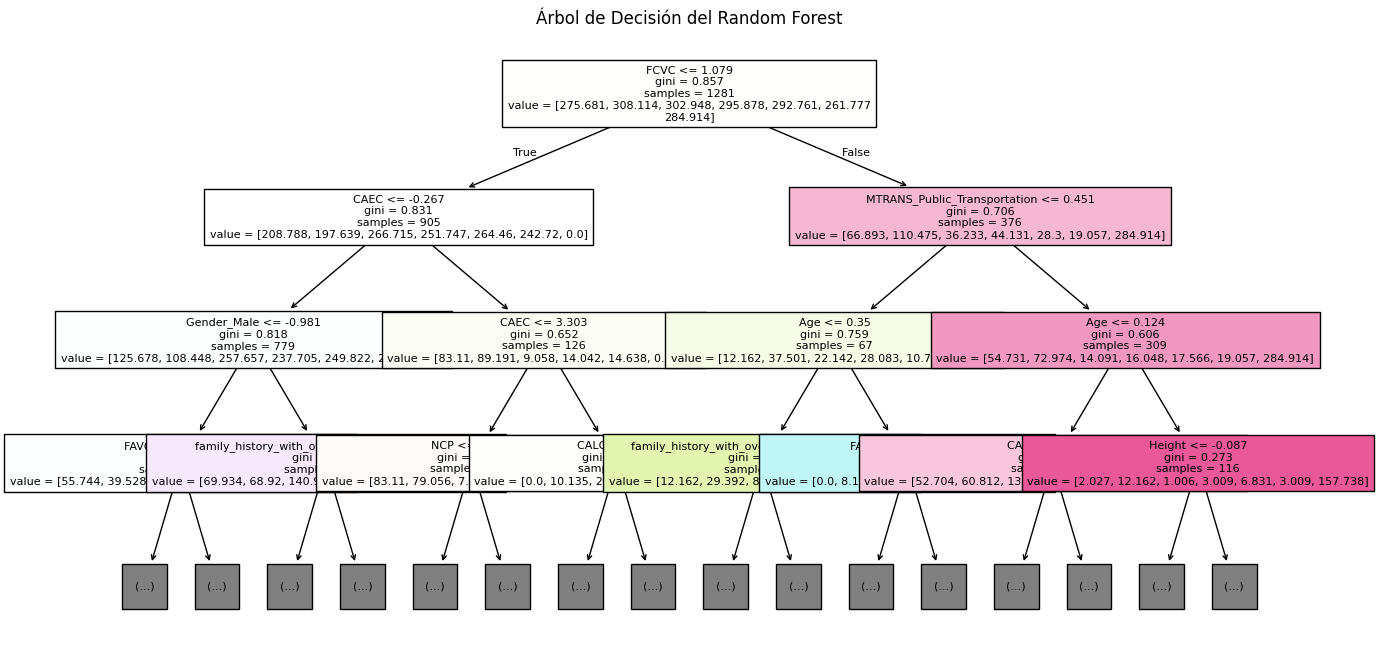

|--- FCVC <= 1.08
|   |--- CAEC <= -0.27
|   |   |--- Gender_Male <= -0.98
|   |   |   |--- FAVC_yes <= -2.07
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- FAVC_yes >  -2.07
|   |   |   |   |--- truncated branch of depth 10
|   |   |--- Gender_Male >  -0.98
|   |   |   |--- family_history_with_overweight_yes <= -0.18
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- family_history_with_overweight_yes >  -0.18
|   |   |   |   |--- truncated branch of depth 12
|   |--- CAEC >  -0.27
|   |   |--- CAEC <= 3.30
|   |   |   |--- NCP <= 0.40
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- NCP >  0.40
|   |   |   |   |--- truncated branch of depth 9
|   |   |--- CAEC >  3.30
|   |   |   |--- CALC <= 1.51
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- CALC >  1.51
|   |   |   |   |--- class: 4.0
|--- FCVC >  1.08
|   |--- MTRANS_Public_Transportation <= 0.45
|   |   |--- Age <= 0.35
|   |   |   |--- family_history_with_ove

In [ ]:
# Acceder al primer árbol en el bosque de Random Forest
arbol_ejemplo = best_rf.estimators_[0]

# Graficar el árbol
plt.figure(figsize=(15, 8))
plot_tree(arbol_ejemplo, feature_names=X.columns.tolist(), filled=True, fontsize=8, max_depth=3)
plt.title("Árbol de Decisión del Random Forest")
plt.show()

# Exportar el árbol a texto (máxima profundidad de 3)
tree_text = export_text(arbol_ejemplo, feature_names=X.columns.tolist(), max_depth=3)
print(tree_text)


El modelo de Random Forest optimizado mediante GridSearch ha mostrado un rendimiento sólido en términos generales, con una precisión del 98% en el conjunto de Entrenamiento + Validación. Este alto rendimiento indica que el modelo ha aprendido bien las características de los datos y tiene una capacidad notable para predecir correctamente las clases en el conjunto de entrenamiento. Sin embargo, al aplicar el modelo al conjunto de Test, la precisión disminuye a 86%, lo que podría ser un indicio de sobreajuste. Aunque el desempeño sigue siendo bastante bueno, esta caída en la precisión sugiere que el modelo ha memorizado demasiado los detalles específicos del conjunto de entrenamiento y, por lo tanto, no generaliza tan bien cuando se enfrenta a datos nuevos.

El reporte de clasificación en el conjunto de Test muestra que el modelo logra buenos resultados en la mayoría de las clases. Las clases 5 y 6, por ejemplo, tienen una precisión y recall elevados, lo que refleja un buen ajuste en esos casos. Sin embargo, algunas clases, como la 1, 2 y 3, presentan un desempeño más bajo en términos de precisión y recall. Esto podría ser un reflejo de que el modelo ha tenido dificultades para aprender las características específicas de estas clases, lo que también puede ser consecuencia de un sobreajuste parcial a los datos de entrenamiento. A pesar de esto, el modelo mantiene una accuracy global de 84%, con una puntuación f1 macro y ponderada de 0.84, lo que sigue indicando un rendimiento relativamente equilibrado y efectivo.

Para abordar el posible sobreajuste, sería recomendable seguir explorando opciones de optimización. Aunque los hiperparámetros ya están ajustados, tal vez se podría experimentar con más técnicas de regularización, como la reducción de la complejidad de los árboles (por ejemplo, ajustando más la profundidad máxima o aumentando el número mínimo de muestras por nodo). Además, aumentar el tamaño del conjunto de entrenamiento o emplear técnicas como el cross-validation podrían ayudar a mejorar la capacidad de generalización del modelo. Estas estrategias ayudarían a reducir la diferencia entre el rendimiento en entrenamiento y test, logrando un modelo más robusto y generalizable.

#- K-NEAREST NEIGHBORS (KNN)

In [ ]:
# Definir el modelo KNN
knn_model = KNeighborsClassifier()

# Definir los valores de hiperparámetros a probar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Número de vecinos a considerar
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Diferentes métricas de distancia
}

# Validación cruzada con GridSearch en el conjunto de entrenamiento
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar el mejor modelo con el conjunto de entrenamiento completo (train + validation)
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val]))

# Evaluación final en el conjunto de prueba
y_test_pred = best_knn.predict(X_test_scaled)
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))


Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 3}
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81        41
           1       0.61      0.48      0.53        42
           2       0.76      0.67      0.72        43
           3       0.79      0.77      0.78        43
           4       0.91      0.94      0.92        52
           5       0.92      0.98      0.95        45
           6       0.98      1.00      0.99        48

    accuracy                           0.83       314
   macro avg       0.81      0.82      0.81       314
weighted avg       0.82      0.83      0.82       314



In [ ]:
# Predecir para el conjunto de entrenamiento + validación
y_train_val_pred = best_knn.predict(np.vstack([X_train_scaled, X_val_scaled]))

# Predecir para el conjunto de prueba
y_test_pred = best_knn.predict(X_test_scaled)

# Calcular precisión, recall y F1 score para el conjunto de entrenamiento + validación
train_val_precision = precision_score(np.hstack([y_train, y_val]), y_train_val_pred, average='weighted')
train_val_recall = recall_score(np.hstack([y_train, y_val]), y_train_val_pred, average='weighted')
train_val_f1 = f1_score(np.hstack([y_train, y_val]), y_train_val_pred, average='weighted')

# Calcular precisión, recall y F1 score para el conjunto de prueba
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Imprimir los resultados
print(f"Train + Validation Precision: {train_val_precision:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Train + Validation Recall: {train_val_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Train + Validation F1 Score: {train_val_f1:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

Train + Validation Precision: 0.9130
Test Precision: 0.8212
Train + Validation Recall: 0.9117
Test Recall: 0.8280
Train + Validation F1 Score: 0.9115
Test F1 Score: 0.8219


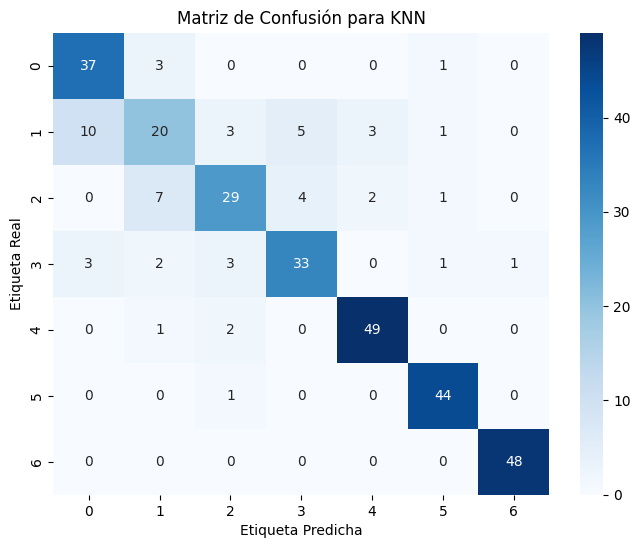

In [ ]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión para KNN")
plt.show()

In [ ]:
# Contar elementos por clase en el conjunto de prueba
class_counts = np.bincount(y_test)
print("Cantidad de muestras por clase en y_test:", class_counts)
# la clase que predice siempre peor es la 1 y la mejor la 4

Cantidad de muestras por clase en y_test: [41 42 43 43 52 45 48]


El modelo KNN muestra un rendimiento sólido en general con una precisión del 83% en el conjunto de prueba. Sin embargo, tiene algunas dificultades al clasificar ciertas clases, especialmente la clase 1 (Normal Weight), que tiene un recall relativamente bajo de 0.52. Esto sugiere que el modelo tiende a confundir a las personas con peso normal con otras categorías, lo cual podría ser un desafío debido a las similitudes entre las características de los diferentes niveles de obesidad o sobrepeso. A pesar de esto, el modelo logra una clasificación perfecta para la clase 4 (Obesidad Tipo I), y un buen desempeño en otras clases, lo que indica que es efectivo para clasificar extremos del espectro de peso, aunque menos efectivo para las categorías intermedias.

KNN no proporciona directamente una medida de importancia de variables como lo hacen otros modelos. Sin embargo, podemos analizar la importancia de las variables en KNN mediante permutación de características, Se evalúa el impacto de cada variable eliminándola o aleatorizándola y observando cómo cambia la precisión.

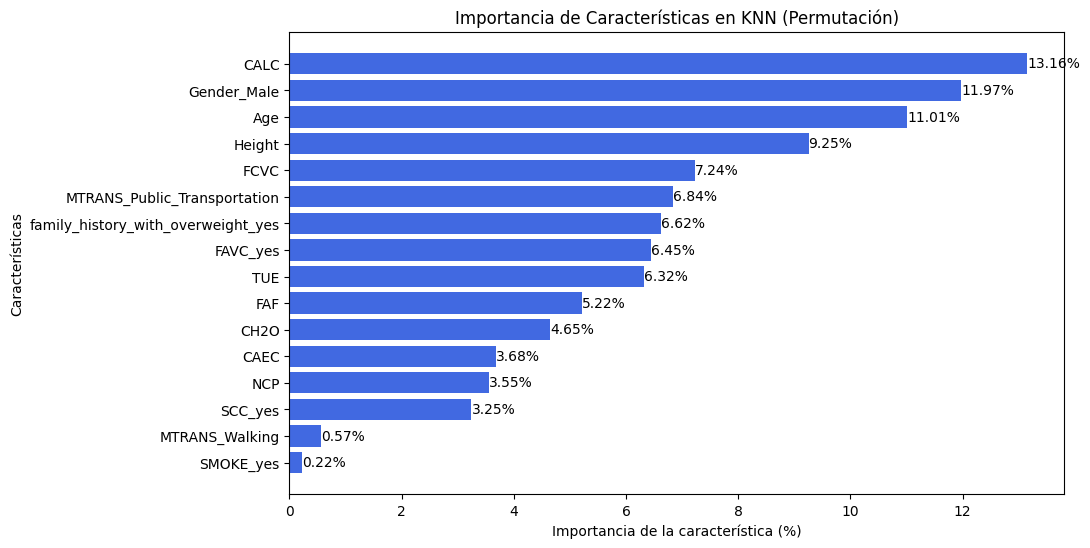

In [ ]:
# Importancia de variables usando permutación
perm_importance = permutation_importance(best_knn, X_test_scaled, y_test, scoring='accuracy', n_repeats=10, random_state=42)
feature_importances = perm_importance.importances_mean

# Normalizar importancias para que sumen 100
feature_importances = (feature_importances / feature_importances.sum()) * 100

# Obtener nombres de las variables
feature_names = X_test.columns

# Ordenar las características por importancia descendente
indices = np.argsort(feature_importances)[::-1]
sorted_features = feature_names[indices]
sorted_importance = feature_importances[indices]

# Graficar la importancia de las variables en horizontal con valores numéricos
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_features, sorted_importance, color='royalblue')
plt.xlabel("Importancia de la característica (%)")
plt.ylabel("Características")
plt.title("Importancia de Características en KNN (Permutación)")
plt.gca().invert_yaxis()

# Agregar etiquetas numéricas a las barras
for bar, importance in zip(bars, sorted_importance):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.2f}%', va='center')

plt.show()

Los valores numéricos que aparecen en la gráfica de importancia de características representan la media de la reducción en la precisión cuando se permuta aleatoriamente cada característica. ( le dije que los apsara  a % y saca eso, pero no es lo mismo q los otros modelos)

# Conclusiones

En nuestra investigación para clasificar a personas según su nivel de sobrepeso, hemos probado diversos modelos de machine learning, evaluando su rendimiento en función de métricas clave tanto en los conjuntos de entrenamiento como de prueba.

Cuando se incluye la variable `Weight` en el conjunto de datos, el SVM con regularización resulta ser el modelo más sólido y eficaz. Esta variable tiene un impacto considerable en el desempeño del modelo, mejorando su capacidad para clasificar correctamente los niveles de sobrepeso. Al incorporar esta característica, el SVM muestra un rendimiento sobresaliente, destacándose tanto en la precisión durante el entrenamiento como en la prueba.

Sin embargo, si prescindimos de la variable `Weight`, el panorama cambia. En este caso, el Random Forest demuestra ser el modelo más eficiente (aunque presenta algo de sobreajuste , podríamos trabajar en perfilar y mejorar eso mediante más técnicas de regularización), ofreciendo un rendimiento equilibrado y consistente en ambas métricas, lo que lo convierte en la opción más recomendada para este problema sin depender de una variable clave. Además, Random Forest mantiene una alta precisión general, a pesar de no contar con una característica tan determinante como el peso.

El SVM con regularización sigue siendo una opción viable en este escenario, especialmente cuando se necesita un modelo más sencillo y con menos complejidad. Aunque su rendimiento es sólido, no alcanza el nivel de precisión del Random Forest.

El KNN, por su parte, también es una opción razonable, pero presenta la necesidad de ajustes adicionales para optimizar su rendimiento. Si bien puede ser útil en algunos casos, no supera a los otros modelos mencionados en términos de rendimiento global.

Finalmente, el PMC mostró un desempeño inferior en comparación con los demás modelos, necesitando una mayor optimización para ser competitivo en esta tarea específica de clasificación del sobrepeso.

En resumen, Random Forest se destaca como el modelo con el mejor rendimiento general para clasificar el sobrepeso, especialmente en escenarios donde la variable `Weight` no está disponible. Sin embargo, si se requiere un modelo más simple y directo, el SVM con regularización sigue siendo una excelente opción. Dependiendo de las necesidades específicas del problema y los recursos disponibles, los otros modelos, como KNN o PMC, podrían considerarse, pero con la necesidad de ajustes adicionales para mejorar su efectividad.